<center>Advanced Regression Assignment Part 1</center>

<b><center>PREDICTING HOUSE PRICES IN AUSTRALIAN HOUSE MARKET</center></b>

A US-based housing company named `Surprise Housing` has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. 

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

pd.set_option('display.max_columns', 250)
pd.set_option('display.max_rows', 250)

## Data Understanding

In [2]:
house_price = pd.read_csv('train.csv')
house_price.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [3]:
house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [4]:
house_price.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

From above description we can clearly notice features like `LotArea`, `MiscVal` have ouliers. We will take care of it later on

In [5]:
house_price.shape

(1460, 81)

In [6]:
# There are 80 features and 1 target variable. Lets find the percent of null data in each column.
round(100* house_price.isnull().sum() / house_price.shape[0], 2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

In [7]:
# lets get rid of the columns having more than 80% null values, since they are not going to 
# contribute much to our analysis

house_price = house_price.loc[:, house_price.isnull().sum() / house_price.shape[0] < 0.8]
house_price.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          4
MasVnrArea        327
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
BsmtExposure        4
BsmtFinType1        6
BsmtFinSF1        637
BsmtFinType2        6
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF          753
2ndFlrSF          417
LowQualFinSF       24
GrLivArea 

In [8]:
# We do not need `Id`. lets get rid of it.
house_price = house_price.drop(['Id'], axis=1)

In [9]:
# Lets form a list of categorical variables, we will create dummies for them.
cat_var_list = ['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 
                'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 
                'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 
                'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 
                'BsmtFinType1', 'BsmtFinType2', 'CentralAir', 'Heating', 'HeatingQC', 'Electrical', 
                'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 
                'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']

# Lets create a separate df containing categorical variables. We shall use this for creating dummies.
house_price_dum = house_price.loc[:, cat_var_list]

### Reducing levels for Categorical variables showing high under-representation

In [10]:
# MSSubClass is a categorical variable, and should not be trated as numeric (as it is currently)

house_price_dum['MSSubClass'] = house_price_dum['MSSubClass'].astype('str')

MSSubClass_categ = {'20': '1-STORY 1946 & NEWER ALL STYLES', '30':'1-STORY 1945 & OLDER',
        '40':'1-STORY W/FINISHED ATTIC ALL AGES', '45':'1-1/2 STORY - UNFINISHED ALL AGES',
        '50':'1-1/2 STORY FINISHED ALL AGES', '60':'2-STORY 1946 & NEWER',
        '70':'2-STORY 1945 & OLDER', '75':'2-1/2 STORY ALL AGES', '80':'SPLIT OR MULTI-LEVEL',
        '85':'SPLIT FOYER','90':'DUPLEX - ALL STYLES AND AGES',
       '120':'1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
       '150':'1-1/2 STORY PUD - ALL AGES', '160':'2-STORY PUD - 1946 & NEWER',
       '180':'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER', 
        '190':'2 FAMILY CONVERSION - ALL STYLES AND AGES'}

house_price_dum['MSSubClass'] = house_price_dum['MSSubClass'].replace(MSSubClass_categ, 
                                                                          regex=True)
print(house_price_dum.MSSubClass.value_counts())

1-STORY 1946 & NEWER ALL STYLES      536
2-STORY 1946 & NEWER                 299
1-1/2 STORY FINISHED ALL AGES        144
11-STORY 1946 & NEWER ALL STYLES      87
1-STORY 1945 & OLDER                  69
12-STORY 1946 & NEWER                 63
2-STORY 1945 & OLDER                  60
SPLIT OR MULTI-LEVEL                  58
DUPLEX - ALL STYLES AND AGES          52
1DUPLEX - ALL STYLES AND AGES         30
SPLIT FOYER                           20
2-1/2 STORY ALL AGES                  16
1-1/2 STORY - UNFINISHED ALL AGES     12
1SPLIT OR MULTI-LEVEL                 10
1-STORY W/FINISHED ATTIC ALL AGES      4
Name: MSSubClass, dtype: int64


In [11]:
replace_val_MSSubClass = {'SPLIT OR MULTI-LEVEL': 'DUP/SPLIT', 'DUPLEX - ALL STYLES AND AGES': 'DUP/SPLIT', 
        '1DUPLEX - ALL STYLES AND AGES': 'DUP/SPLIT', 'SPLIT FOYER': 'DUP/SPLIT', 
        '1SPLIT OR MULTI-LEVEL': 'DUP/SPLIT',             
               
        '1-1/2 STORY FINISHED ALL AGES': '1-1/2 or 2 or 2-1/2 STORY ALL AGES', 
        '1-1/2 STORY - UNFINISHED ALL AGES': '1-1/2 or 2 or 2-1/2 STORY ALL AGES',
        '2-1/2 STORY ALL AGES': '1-1/2 or 2 or 2-1/2 STORY ALL AGES',
        '1-STORY W/FINISHED ATTIC ALL AGES': '1-1/2 or 2 or 2-1/2 STORY ALL AGES',
        
        '11-STORY 1946 & NEWER ALL STYLES': '11 or 12 STORY 1946 & NEWER',
        '12-STORY 1946 & NEWER': '11 or 12 STORY 1946 & NEWER',
        
        '1-STORY 1945 & OLDER': '1 or 2 STORY 1945 & OLDER', 
        '2-STORY 1945 & OLDER': '1 or 2 STORY 1945 & OLDER'
        }

house_price_dum.MSSubClass = house_price_dum['MSSubClass'].replace(replace_val_MSSubClass)
print(house_price_dum.MSSubClass.value_counts())

1-STORY 1946 & NEWER ALL STYLES       536
2-STORY 1946 & NEWER                  299
1-1/2 or 2 or 2-1/2 STORY ALL AGES    176
DUP/SPLIT                             170
11 or 12 STORY 1946 & NEWER           150
1 or 2 STORY 1945 & OLDER             129
Name: MSSubClass, dtype: int64


Similarly lets try reducing levels for other variables too possessing skewed representation of levels

In [12]:
# MSZoning

# RL         1151
# RM          218
# FV           65
# RH           16
# C (all)      10

replace_val_MSZoning = {'RM': 'OTHERS', 'FV': 'OTHERS', 'C (all)': 'OTHERS', 'RH': 'OTHERS'}
house_price_dum.MSZoning = house_price_dum['MSZoning'].replace(replace_val_MSZoning)
print('\n', house_price_dum.MSZoning.value_counts())
###########################################################################################

# LotShape

# Reg    925
# IR1    484
# IR2     41
# IR3     10

replace_val_LotShape = {'IR1': 'Irreg', 'IR2': 'Irreg', 'IR3': 'Irreg'}
house_price_dum.LotShape = house_price_dum['LotShape'].replace(replace_val_LotShape)
print('\n', house_price_dum.LotShape.value_counts())
###########################################################################################

# LotConfig

# Inside     1052
# Corner      263
# CulDSac      94
# FR2          47
# FR3           4

replace_val_LotConfig = {'Corner': 'Other', 'CulDSac': 'Other', 'FR2': 'Other', 'FR3': 'Other'}
house_price_dum.LotConfig = house_price_dum['LotConfig'].replace(replace_val_LotConfig)
print('\n', house_price_dum.LotConfig.value_counts())
###########################################################################################

# Condition1

# Norm      1260
# Feedr       81
# Artery      48
# RRAn        26
# PosN        19
# RRAe        11
# PosA         8
# RRNn         5
# RRNe         2

replace_val_Condition1 = {'Feedr': 'Other', 'Artery': 'Other', 'RRAn': 'Other', 'PosN': 'Other',
                         'RRAe': 'Other', 'PosA': 'Other', 'RRNn': 'Other', 'RRNe': 'Other'}
house_price_dum.Condition1 = house_price_dum['Condition1'].replace(replace_val_Condition1)
print('\n', house_price_dum.Condition1.value_counts())
###########################################################################################

# BldgType

# 1Fam      1220
# TwnhsE     114
# Duplex      52
# Twnhs       43
# 2fmCon      31

replace_val_BldgType = {'TwnhsE': 'Other', 'Duplex': 'Other', 'Twnhs': 'Other', '2fmCon': 'Other'}
house_price_dum.BldgType = house_price_dum['BldgType'].replace(replace_val_BldgType)
print('\n', house_price_dum.BldgType.value_counts())
###########################################################################################

# RoofStyle

# Gable      1141
# Hip         286
# Flat         13
# Gambrel      11
# Mansard       7
# Shed          2

replace_val_RoofStyle = {'Hip': 'Other', 'Flat': 'Other', 'Gambrel': 'Other', 
                         'Mansard': 'Other', 'Shed': 'Other'}
house_price_dum.RoofStyle = house_price_dum['RoofStyle'].replace(replace_val_RoofStyle)
print('\n', house_price_dum.RoofStyle.value_counts())
###########################################################################################

# MasVnrType

# None       864
# BrkFace    445
# Stone      128
# BrkCmn      15

replace_val_MasVnrType = {'BrkFace': 'Brick/Stone', 'Stone': 'Brick/Stone', 'BrkCmn': 'Brick/Stone'}
house_price_dum.MasVnrType = house_price_dum['MasVnrType'].replace(replace_val_MasVnrType)
print('\n', house_price_dum.MasVnrType.value_counts())
###########################################################################################

# ExterQual

# TA    906
# Gd    488
# Ex     52
# Fa     14

replace_val_ExterQual = {'Ex': 'Ex/Gd/Fa', 'Gd': 'Ex/Gd/Fa', 'Fa': 'Ex/Gd/Fa'}
house_price_dum.ExterQual = house_price_dum['ExterQual'].replace(replace_val_ExterQual)
print('\n', house_price_dum.ExterQual.value_counts())
###########################################################################################

# ExterCond

# TA    1282
# Gd     146
# Fa      28
# Ex       3
# Po       1

# We will substitute Excellent and Poor with Good/Fair and TA resp.(as there are merely 3 and 1 
# entries resp.)
# Also we will replace Good and Fair with Good/Fair to reduce unnecessary levels.
replace_val_ExterCond = {'Gd': 'Good/Fair', 'Fa': 'Good/Fair', 
                          'Ex': 'Good/Fair', 'Po': 'TA'}
house_price_dum.ExterCond = house_price_dum['ExterCond'].replace(replace_val_ExterCond)
print('\n', house_price_dum.ExterCond.value_counts())
###########################################################################################

# HeatingQC

# Ex    741
# TA    428
# Gd    241
# Fa     49
# Po      1

# We will substitute Poor with Typical/Average TA (as there is merely 1 entry)
# Also we will replace Good and Fair with Good/Fair to reduce unnecessary levels.
replace_val_HeatingQC = {'Gd': 'Good/Fair', 'Fa': 'Good/Fair', 'Po': 'TA'}
house_price_dum.HeatingQC = house_price_dum['HeatingQC'].replace(replace_val_HeatingQC)
print('\n', house_price_dum.HeatingQC.value_counts())
###########################################################################################

# KitchenQual

# TA    735
# Gd    586
# Ex    100
# Fa     39

# # We will substitute Excellent, Good, Fair with Exc/Good/Fair to reduce unnecessary levels.
replace_val_KitchenQual = {'Ex': 'Ex/Good/Fair', 'Gd': 'Ex/Good/Fair', 'Fa': 'Ex/Good/Fair'}
house_price_dum.KitchenQual = house_price_dum['KitchenQual'].replace(replace_val_KitchenQual)
print('\n', house_price_dum.KitchenQual.value_counts())
###########################################################################################

# FireplaceQu

# Gd    380
# TA    313
# Fa     33
# Ex     24
# Po     20

replace_val_HouseStyle = {'Fa': 'Ex/Gd/Fa', 'Ex': 'Ex/Gd/Fa', 'Po': 'TA'}
house_price_dum.HouseStyle = house_price_dum['HouseStyle'].replace(replace_val_HouseStyle)
print('\n', house_price_dum.HouseStyle.value_counts())
###########################################################################################

# Foundation

# PConc     647
# CBlock    634
# BrkTil    146
# Slab       24
# Stone       6
# Wood        3

replace_val_Foundation = {'BrkTil': 'Brick/Stone/Slab/Wood', 'Stone': 'Brick/Stone/Slab/Wood', 
                          'Slab': 'Brick/Stone/Slab/Wood', 'Wood': 'Brick/Stone/Slab/Wood'}
house_price_dum.Foundation = house_price_dum['Foundation'].replace(replace_val_Foundation)
print('\n', house_price_dum.Foundation.value_counts())
###########################################################################################

# GarageType

# Attchd     870
# Detchd     387
# BuiltIn     88
# Basment     19
# CarPort      9
# 2Types       6

replace_val_GarageType = {'Detchd': 'Other', 'BuiltIn': 'Other', 'Basment': 'Other', 
                          'CarPort': 'Other', '2Types': 'Other'}
house_price_dum.GarageType = house_price_dum['GarageType'].replace(replace_val_GarageType)
print('\n', house_price_dum.GarageType.value_counts())
###########################################################################################

# SaleCondition

# Normal     1198
# Partial     125
# Abnorml     101
# Family       20
# Alloca       12
# AdjLand       4

replace_val_SaleCondition = {'Partial': 'Other', 'Abnorml': 'Other', 'Family': 'Other', 
                          'Alloca': 'Other', 'AdjLand': 'Other'}
house_price_dum.SaleCondition = house_price_dum['SaleCondition'].replace(replace_val_SaleCondition)
print('\n', house_price_dum.SaleCondition.value_counts())
###########################################################################################

# HouseStyle

# 1Story    726
# 2Story    445
# 1.5Fin    154
# SLvl       65
# SFoyer     37
# 1.5Unf     14
# 2.5Unf     11
# 2.5Fin      8

replace_val_HouseStyle = {'1.5Fin': 'Other', 'SLvl': 'Other', 'SFoyer': 'Other', 
                          '1.5Unf': 'Other', '2.5Unf': 'Other', '2.5Fin': 'Other'}
house_price_dum.HouseStyle = house_price_dum['HouseStyle'].replace(replace_val_HouseStyle)
print('\n', house_price_dum.HouseStyle.value_counts())
###########################################################################################


 RL        1151
OTHERS     309
Name: MSZoning, dtype: int64

 Reg      925
Irreg    535
Name: LotShape, dtype: int64

 Inside    1052
Other      408
Name: LotConfig, dtype: int64

 Norm     1260
Other     200
Name: Condition1, dtype: int64

 1Fam     1220
Other     240
Name: BldgType, dtype: int64

 Gable    1141
Other     319
Name: RoofStyle, dtype: int64

 None           864
Brick/Stone    588
Name: MasVnrType, dtype: int64

 TA          906
Ex/Gd/Fa    554
Name: ExterQual, dtype: int64

 TA           1283
Good/Fair     177
Name: ExterCond, dtype: int64

 Ex           741
TA           429
Good/Fair    290
Name: HeatingQC, dtype: int64

 TA              735
Ex/Good/Fair    725
Name: KitchenQual, dtype: int64

 1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

 PConc                    647
CBlock                   634
Brick/Stone/Slab/Wood    179
Name: Foundation, dtype: int64

 Attchd    870

#### Data Visualization for categorical features

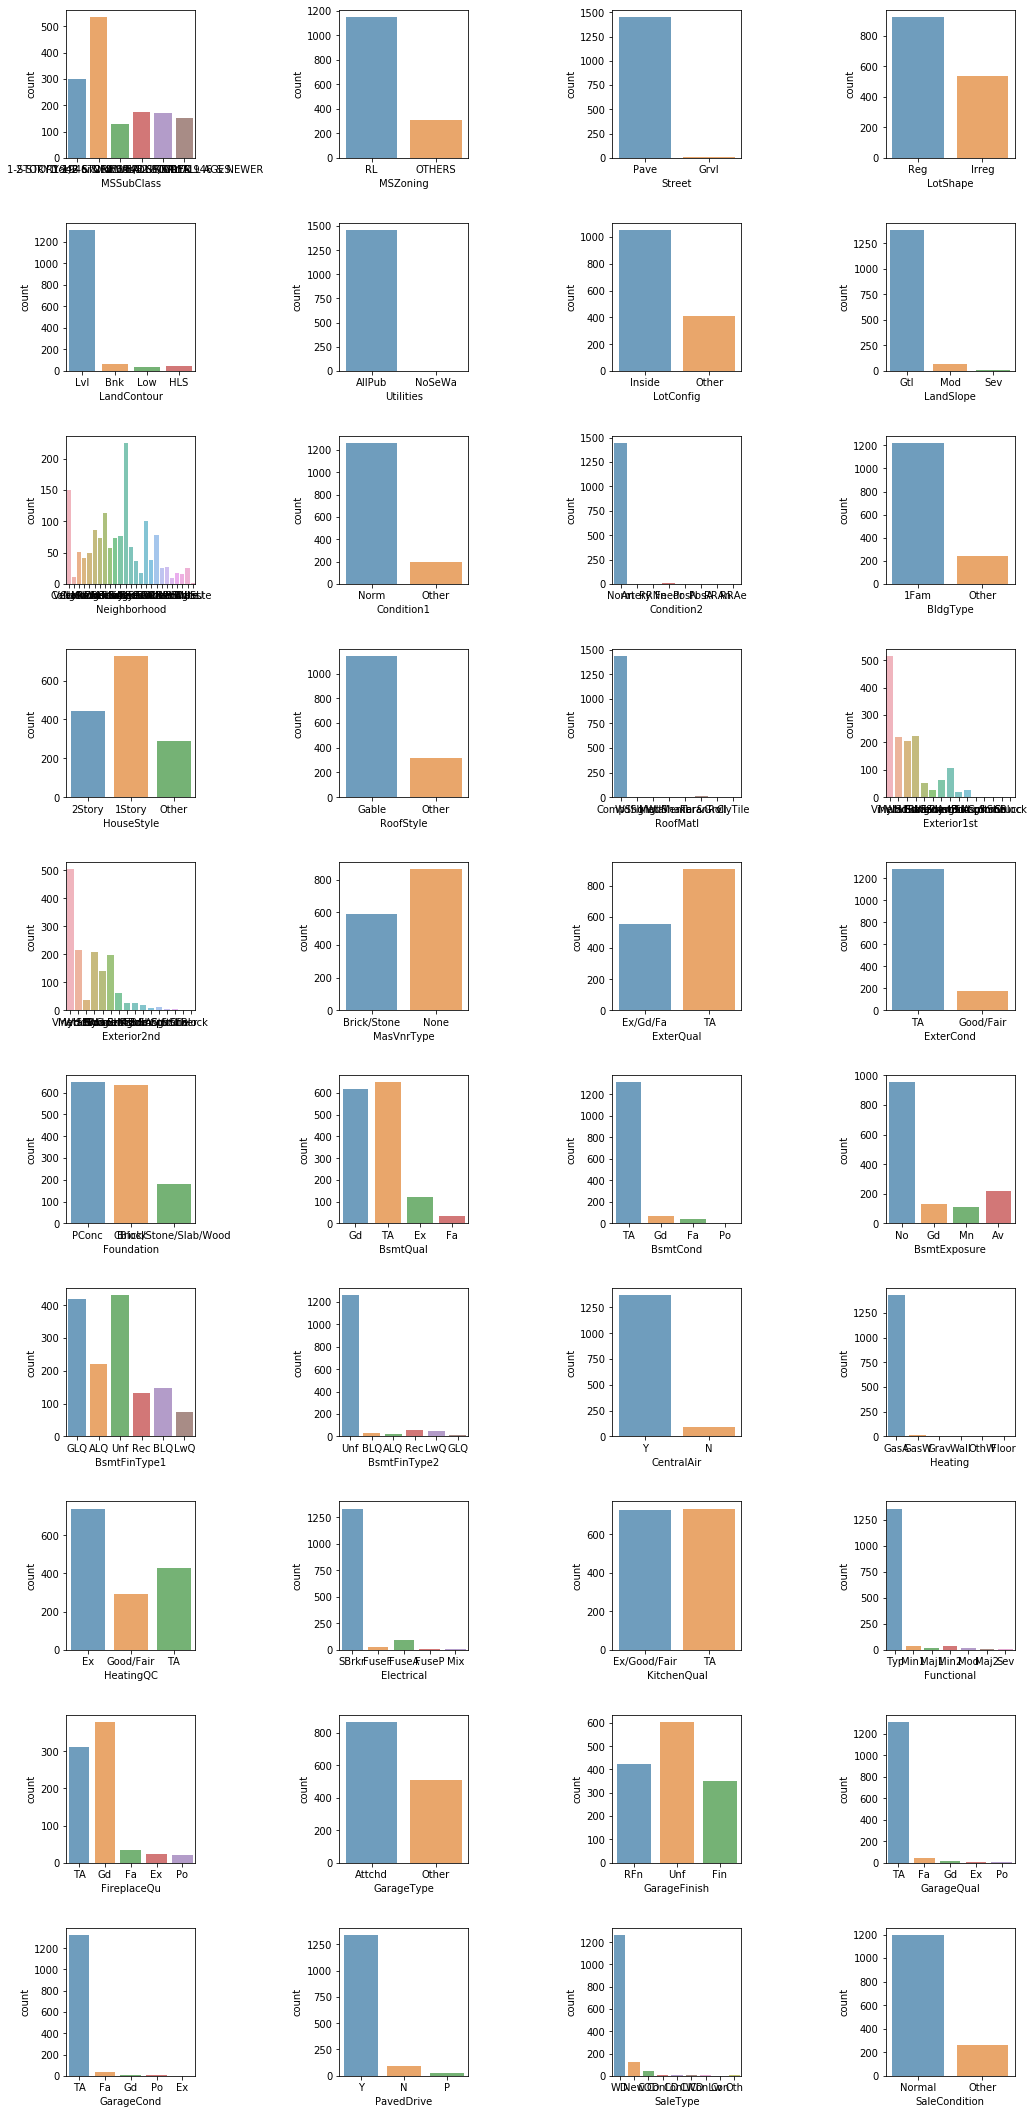

In [13]:
# Lets have a countplot to visualize how categorical varibales have their data distributed
figure = plt.figure(figsize = (15,30))
for i in range(0, len(cat_var_list)):
    plt.subplot(10,4,i+1)
    figure.tight_layout(pad=3.0)
    sns.countplot(x = cat_var_list[i], alpha =0.7, data = house_price_dum)

We find that there are many Categorical variables that are having levels which do not show a good representation in the respective feature.

For e.g., `Utilities` is almost completely filled with 'AllPub'. There is almost no 'NoSeWa'

In [14]:
# We shall remove them such features, that have more than 90% representation of a single level 
# only. Based on the above visualization, below features need to be removed:

# `Street`, `LandContour`, `LandSlope`, `Condition2`, `RoofMatl`, `BsmtCond`, `BsmtFinType2`, 
# `CentralAir`, `Heating`, `Electrical`, `Functional`, `GarageQual`, `GarageCond`, 
# `PavedDrive`, `SaleType` 

house_price_dum = house_price_dum.drop(['Street', 'LandContour', 'Utilities', 'LandSlope', 
                                        'Condition2', 'RoofMatl', 'BsmtCond', 'BsmtFinType2',
                                        'CentralAir', 'Heating', 'Electrical', 'Functional',
                                         'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType'], 
                                       axis = 1)

dum_var = house_price_dum.columns

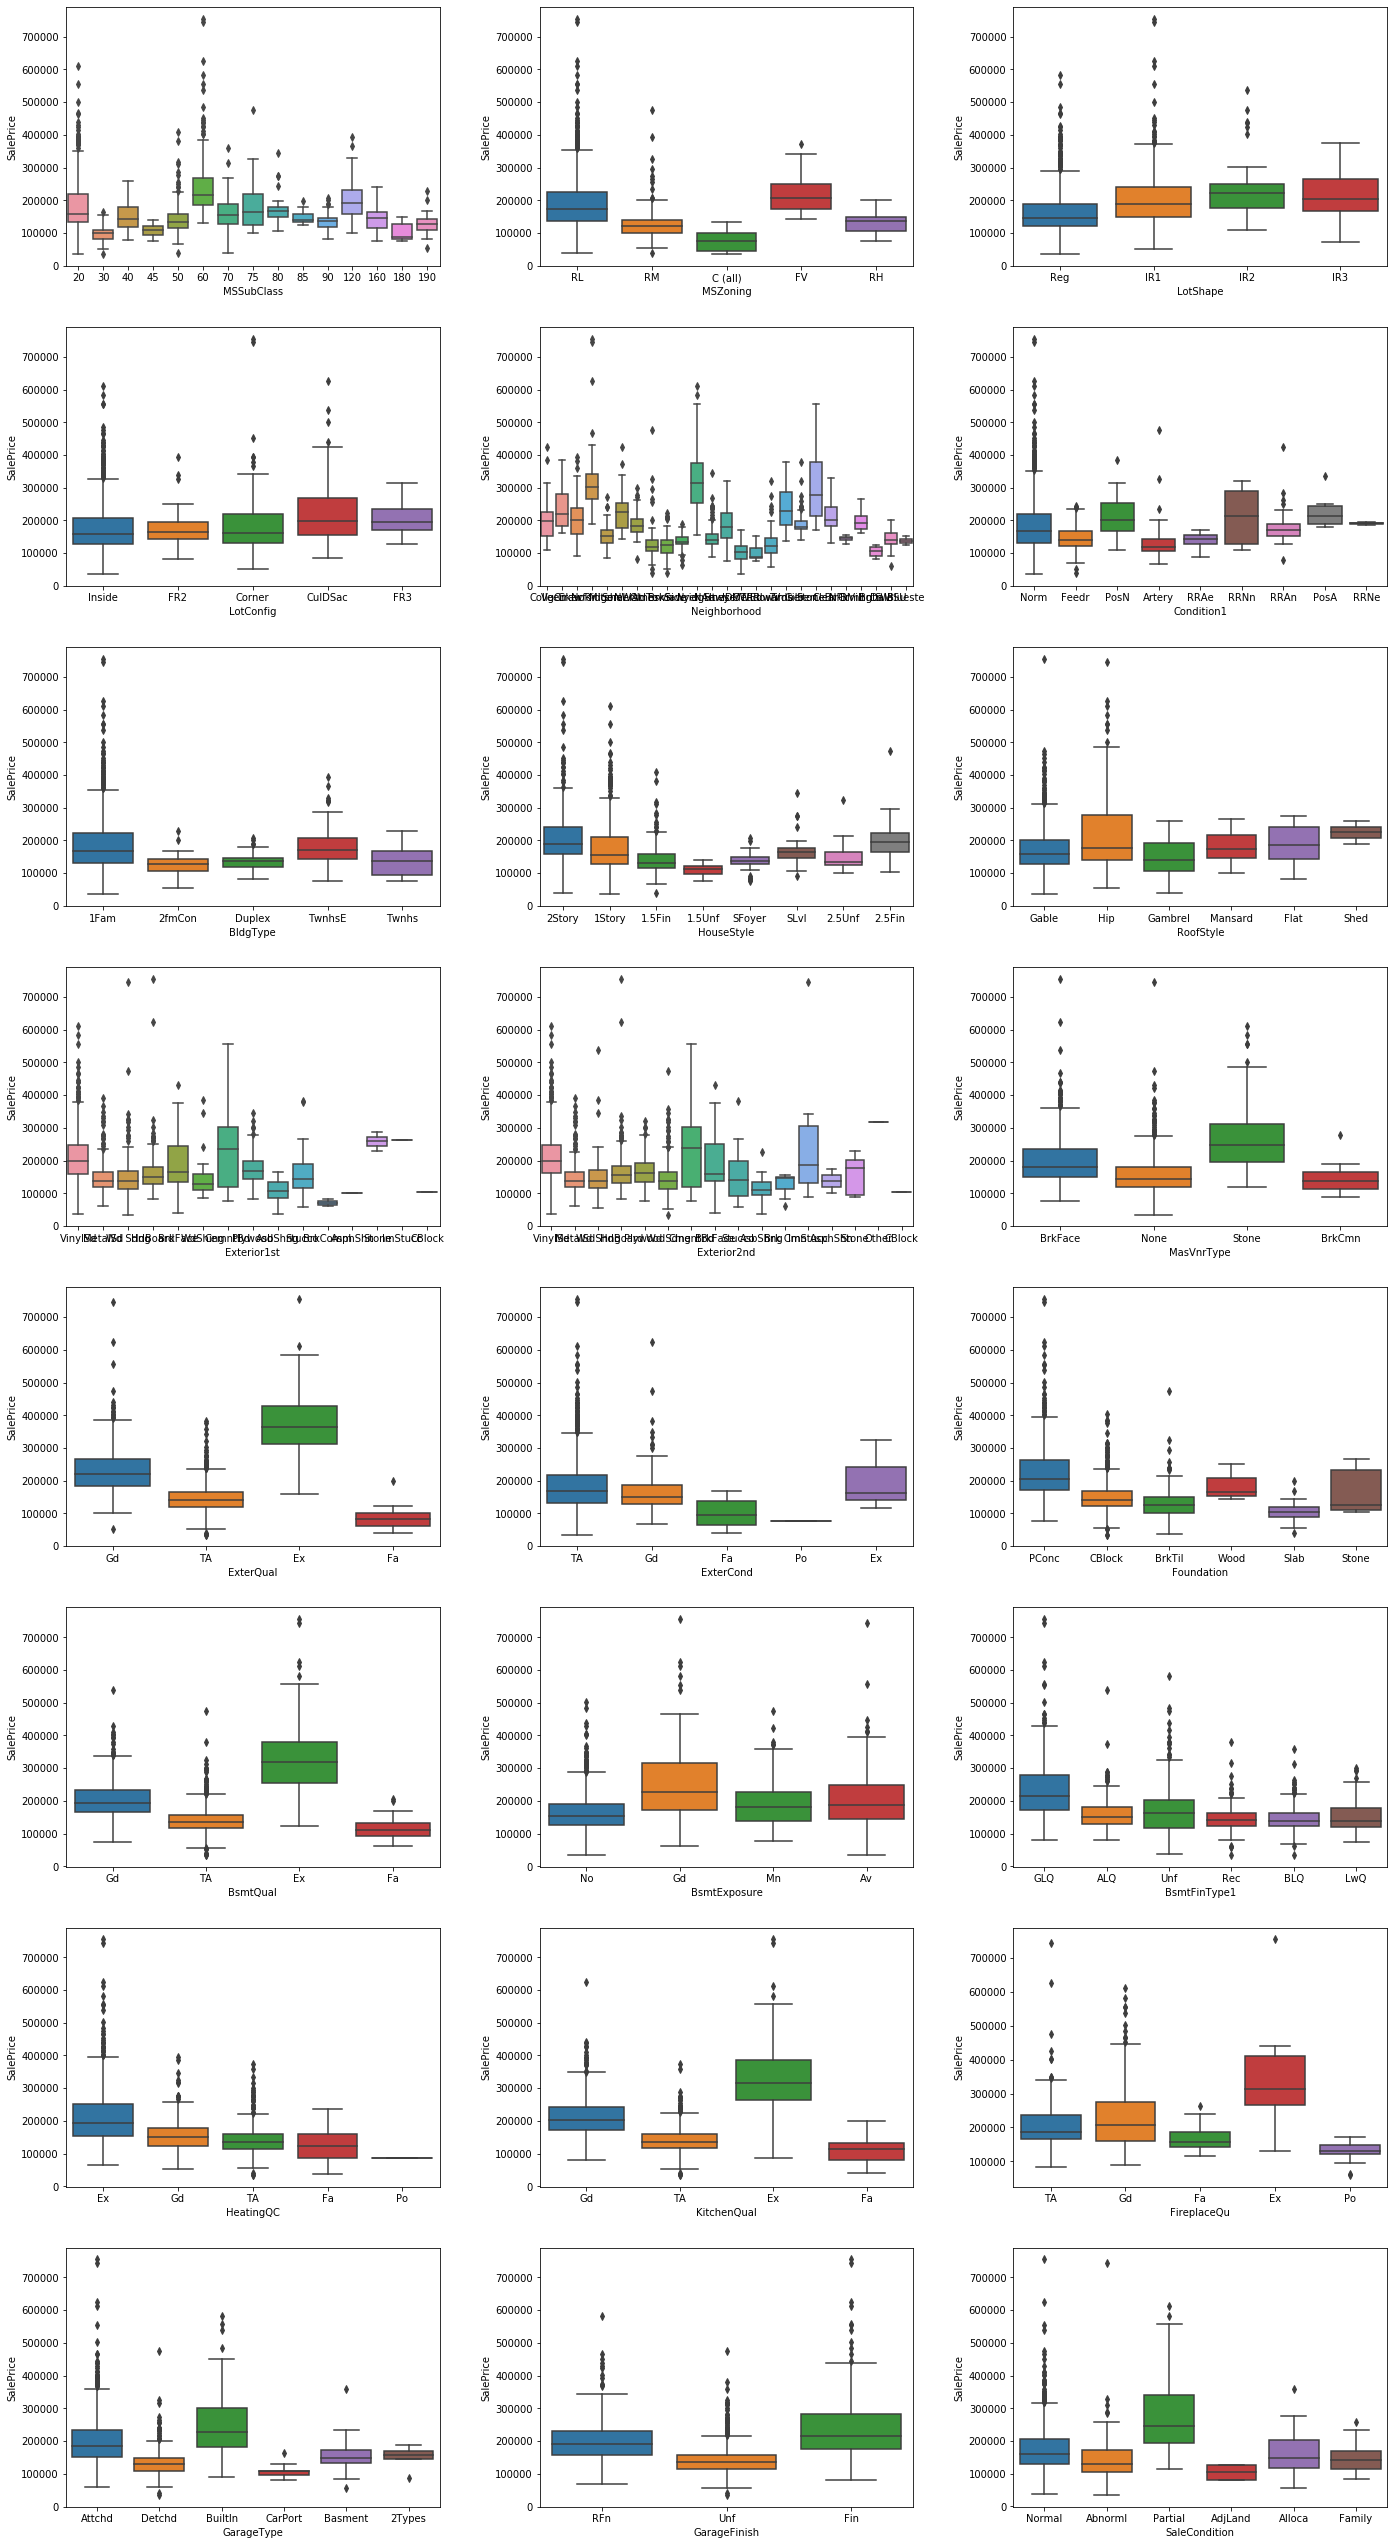

In [15]:
# lets plot a boxplot for all the categorical variables against the SalePrice (target variable)

j = 1
figure = plt.figure(figsize = (20,40))
for i in dum_var:
    plt.subplot(9,3,j)
    sns.boxplot(x = i, y = 'SalePrice', data = house_price)
    j = j + 1
    figure.tight_layout(pad = 3.0)

In [16]:
# For the rest of the categorical variables, lets create dummies, since for further analysis,
# we would need them in numeric form.

house_price_dum = pd.get_dummies(house_price_dum, drop_first= True)

In [17]:
# From our original house_price dataset, we'll drop the categorical variables
house_price = house_price.drop(cat_var_list, axis = 1)

# the features left after dropping the categorical variables are all numeric, 
# lets store them in a list that we will later use
num_var = house_price.columns

# Lets now join the house_price df and house_price_dum df
house_price = house_price.join(house_price_dum)
house_price

LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0            65.0     8450            7            5       2003          2003   
1            80.0     9600            6            8       1976          1976   
2            68.0    11250            7            5       2001          2002   
3            60.0     9550            7            5       1915          1970   
4            84.0    14260            8            5       2000          2000   
...           ...      ...          ...          ...        ...           ...   
1455         62.0     7917            6            5       1999          2000   
1456         85.0    13175            6            6       1978          1988   
1457         66.0     9042            7            9       1941          2006   
1458         68.0     9717            5            6       1950          1996   
1459         75.0     9937            5            6       1965          1965   

      MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
0          196.0         706           0        150          856       856   
1            0.0         978           0        284         1262      1262   
2          162.0         486           0        434          920       920   
3            0.0         216           0        540          756       961   
4          350.0         655           0        490         1145      1145   
...          ...         ...         ...        ...          ...       ...   
1455         0.0           0           0        953          953       953   
1456       119.0         790         163        589         1542      2073   
1457         0.0         275           0        877         1152      1188   
1458         0.0          49        1029          0         1078      1078   
1459         0.0         830         290        136         1256      1256   

      2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0          854             0       1710             1             0         2   
1            0             0       1262             0             1         2   
2          866             0       1786             1             0         2   
3          756             0       1717             1             0         1   
4         1053             0       2198             1             0         2   
...        ...           ...        ...           ...           ...       ...   
1455       694             0       1647             0             0         2   
1456         0             0       2073             1             0         2   
1457      1152             0       2340             0             0         2   
1458         0             0       1078             1             0         1   
1459         0             0       1256             1             0         1   

      HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0            1             3             1             8           0   
1            0             3             1             6           1   
2            1             3             1             6           1   
3            0             3             1             7           1   
4            1             4             1             9           1   
...        ...           ...           ...           ...         ...   
1455         1             3             1             7           1   
1456         0             3             1             7           2   
1457         0             4             1             9           2   
1458         0             2             1             5           0   
1459         1             3             1             6           0   

      GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0          2003.0           2         548           0           61   
1          1976.0           2         460         298            0   
2          2001.0           2         608       

### Data Imputation for missing values for numeric features

In [18]:
# Lets list down the missing values in the df now
pd.DataFrame(house_price.isna().sum(), 
    columns=['Missing_values']).sort_values(by=['Missing_values'], ascending=False).head()

Missing_values
LotFrontage                     259
GarageYrBlt                      81
MasVnrArea                        8
Exterior2nd_BrkFace               0
Exterior1st_VinylSd               0

There are 259 missing values in `LotFrontage` and 8 missing values in `MasVnrArea`

1. Lets impute the `LotFrontage` by its median. [We wont consider mean because of the presence of an outlier in this column]
2. There are just 8 missing values of `MasVnrArea`, we would therefore impute these with Median value.

In [19]:
house_price.LotFrontage.fillna(value = np.nanmedian(house_price.LotFrontage), inplace = True)
house_price.MasVnrArea.fillna(value = np.nanmedian(house_price.MasVnrArea), inplace = True)

1. There are also 81 amissing values in `GarageYrBlt`

The missing values in GarageYrBlt constitute ~5% of the total data. Instead of removing it, lets try to see ways in which we can accomodate this data by imputing it with a list of years.

In [20]:
# Lets find out the median and mode of the `GarageBltYr` and note the findings
print(np.nanmedian(house_price.GarageYrBlt))
print(house_price.GarageYrBlt.mode())
house_price.groupby(['GarageYrBlt'])['GarageYrBlt'].count()

1980.0
0    2005.0
dtype: float64


GarageYrBlt
1900.0     1
1906.0     1
1908.0     1
1910.0     3
1914.0     2
1915.0     2
1916.0     5
1918.0     2
1920.0    14
1921.0     3
1922.0     5
1923.0     3
1924.0     3
1925.0    10
1926.0     6
1927.0     1
1928.0     4
1929.0     2
1930.0     8
1931.0     4
1932.0     3
1933.0     1
1934.0     2
1935.0     4
1936.0     5
1937.0     2
1938.0     3
1939.0     9
1940.0    14
1941.0    10
1942.0     2
1945.0     4
1946.0     4
1947.0     2
1948.0    11
1949.0     8
1950.0    24
1951.0     6
1952.0     3
1953.0    12
1954.0    19
1955.0    13
1956.0    16
1957.0    20
1958.0    21
1959.0    17
1960.0    19
1961.0    13
1962.0    21
1963.0    16
1964.0    18
1965.0    21
1966.0    21
1967.0    15
1968.0    26
1969.0    15
1970.0    20
1971.0    13
1972.0    14
1973.0    14
1974.0    18
1975.0     9
1976.0    29
1977.0    35
1978.0    19
1979.0    15
1980.0    15
1981.0    10
1982.0     4
1983.0     7
1984.0     8
1985.0    10
1986.0     6
1987.0    11
1988.0    14
1989.0    10


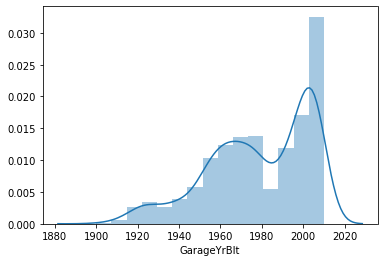

In [21]:
# Lets create a df containing the na values for GarageYrBlt, and remove the entries with 
# na values, and plot the yearwise distribution

house_price_garage_yr_blt = house_price[house_price.GarageYrBlt.isna()]
house_price = house_price[~house_price.GarageYrBlt.isna()]
sns.distplot(house_price.GarageYrBlt)

We find out that the median of the year is 1980, where as mode is 2005. Imputing the missing values with one of these values wont be a good decision. Let us try instead to fill the missing values with the list of years ranging between 1980 and 2005. In this way we can save losing out this data, and at the same time do not fill-in a single year value which might introduce a little bias.

In [22]:
j = 0
for k in range(0, 3):
    house_price_garage_yr_blt.GarageYrBlt[j:j+27] = [i for i in range(1980, 2007)]
    j = j+27
house_price_garage_yr_blt.GarageYrBlt = house_price_garage_yr_blt.GarageYrBlt.astype(int)
# house_price_garage_yr_blt.head(20)

C:\Users\akhilshu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\akhilshu\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\series.py:1237: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_with(key, value)
C:\Users\akhilshu\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3326: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentatio

In [23]:
# Lets concatenate the imputed data rows (for garage_yr_blt) with our original df house_price
house_price = pd.concat([house_price, house_price_garage_yr_blt])

#### Data Visualization for the numeric features in house_price dataset

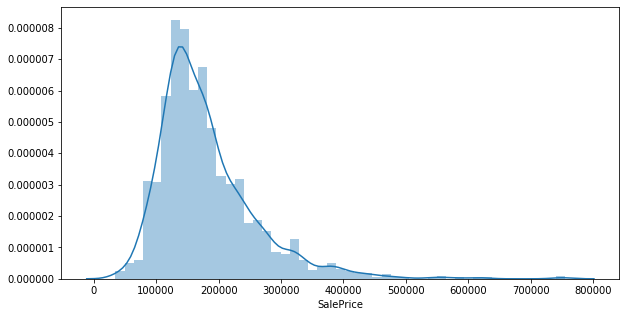

In [24]:
# Lets visualize how our target variable, 'SalePrice' is distributed.
figure = plt.figure(figsize = (10,5))
sns.distplot(house_price.SalePrice)

We observe that the SalePrice Distribution is skewed. This could be explained due to the reason that many people could not afford expensive houses.

We shall try to use tranformation techniques later (before modeling) to transform our target variable to follow normal distribution.

<Figure size 1440x2160 with 0 Axes>

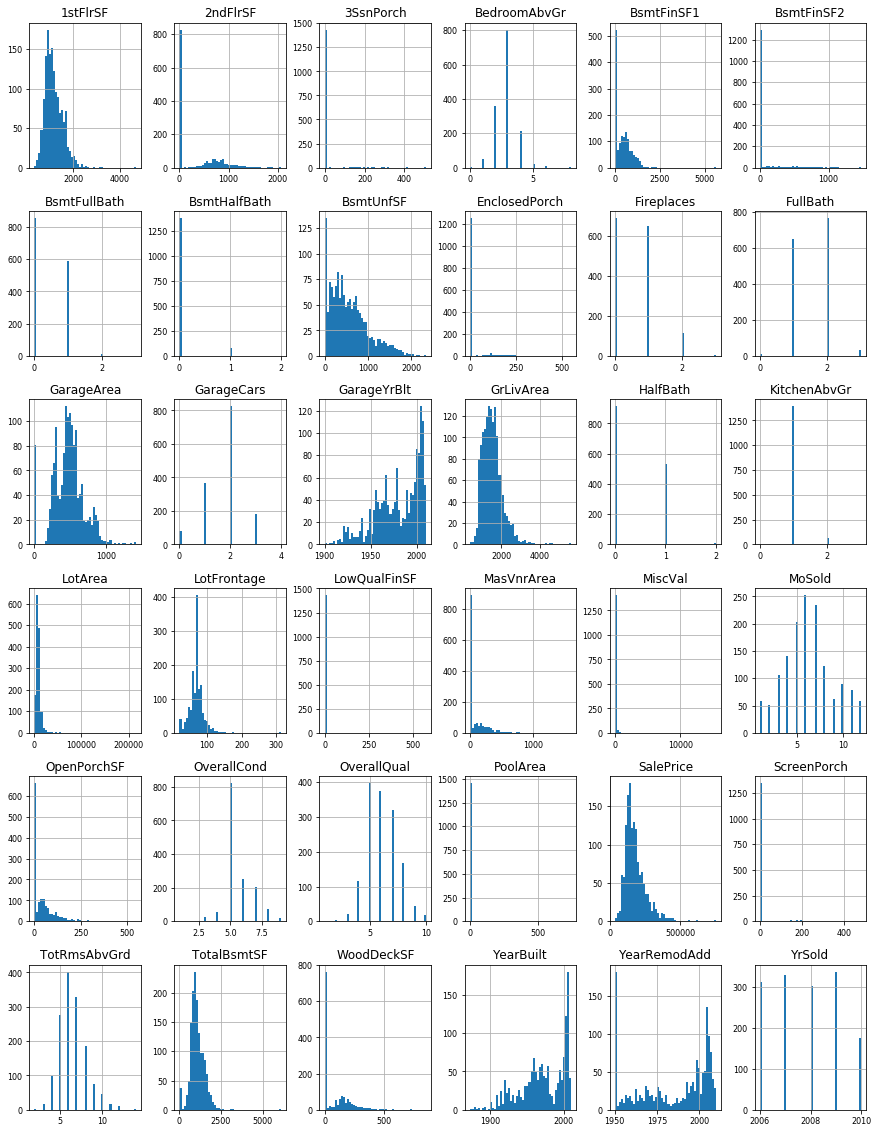

In [25]:
figure = plt.figure(figsize=(20,30))
figure.tight_layout(pad = 3.0)
house_price.loc[:, num_var].hist(figsize = (15,20), bins=50, xlabelsize=8, ylabelsize=8);

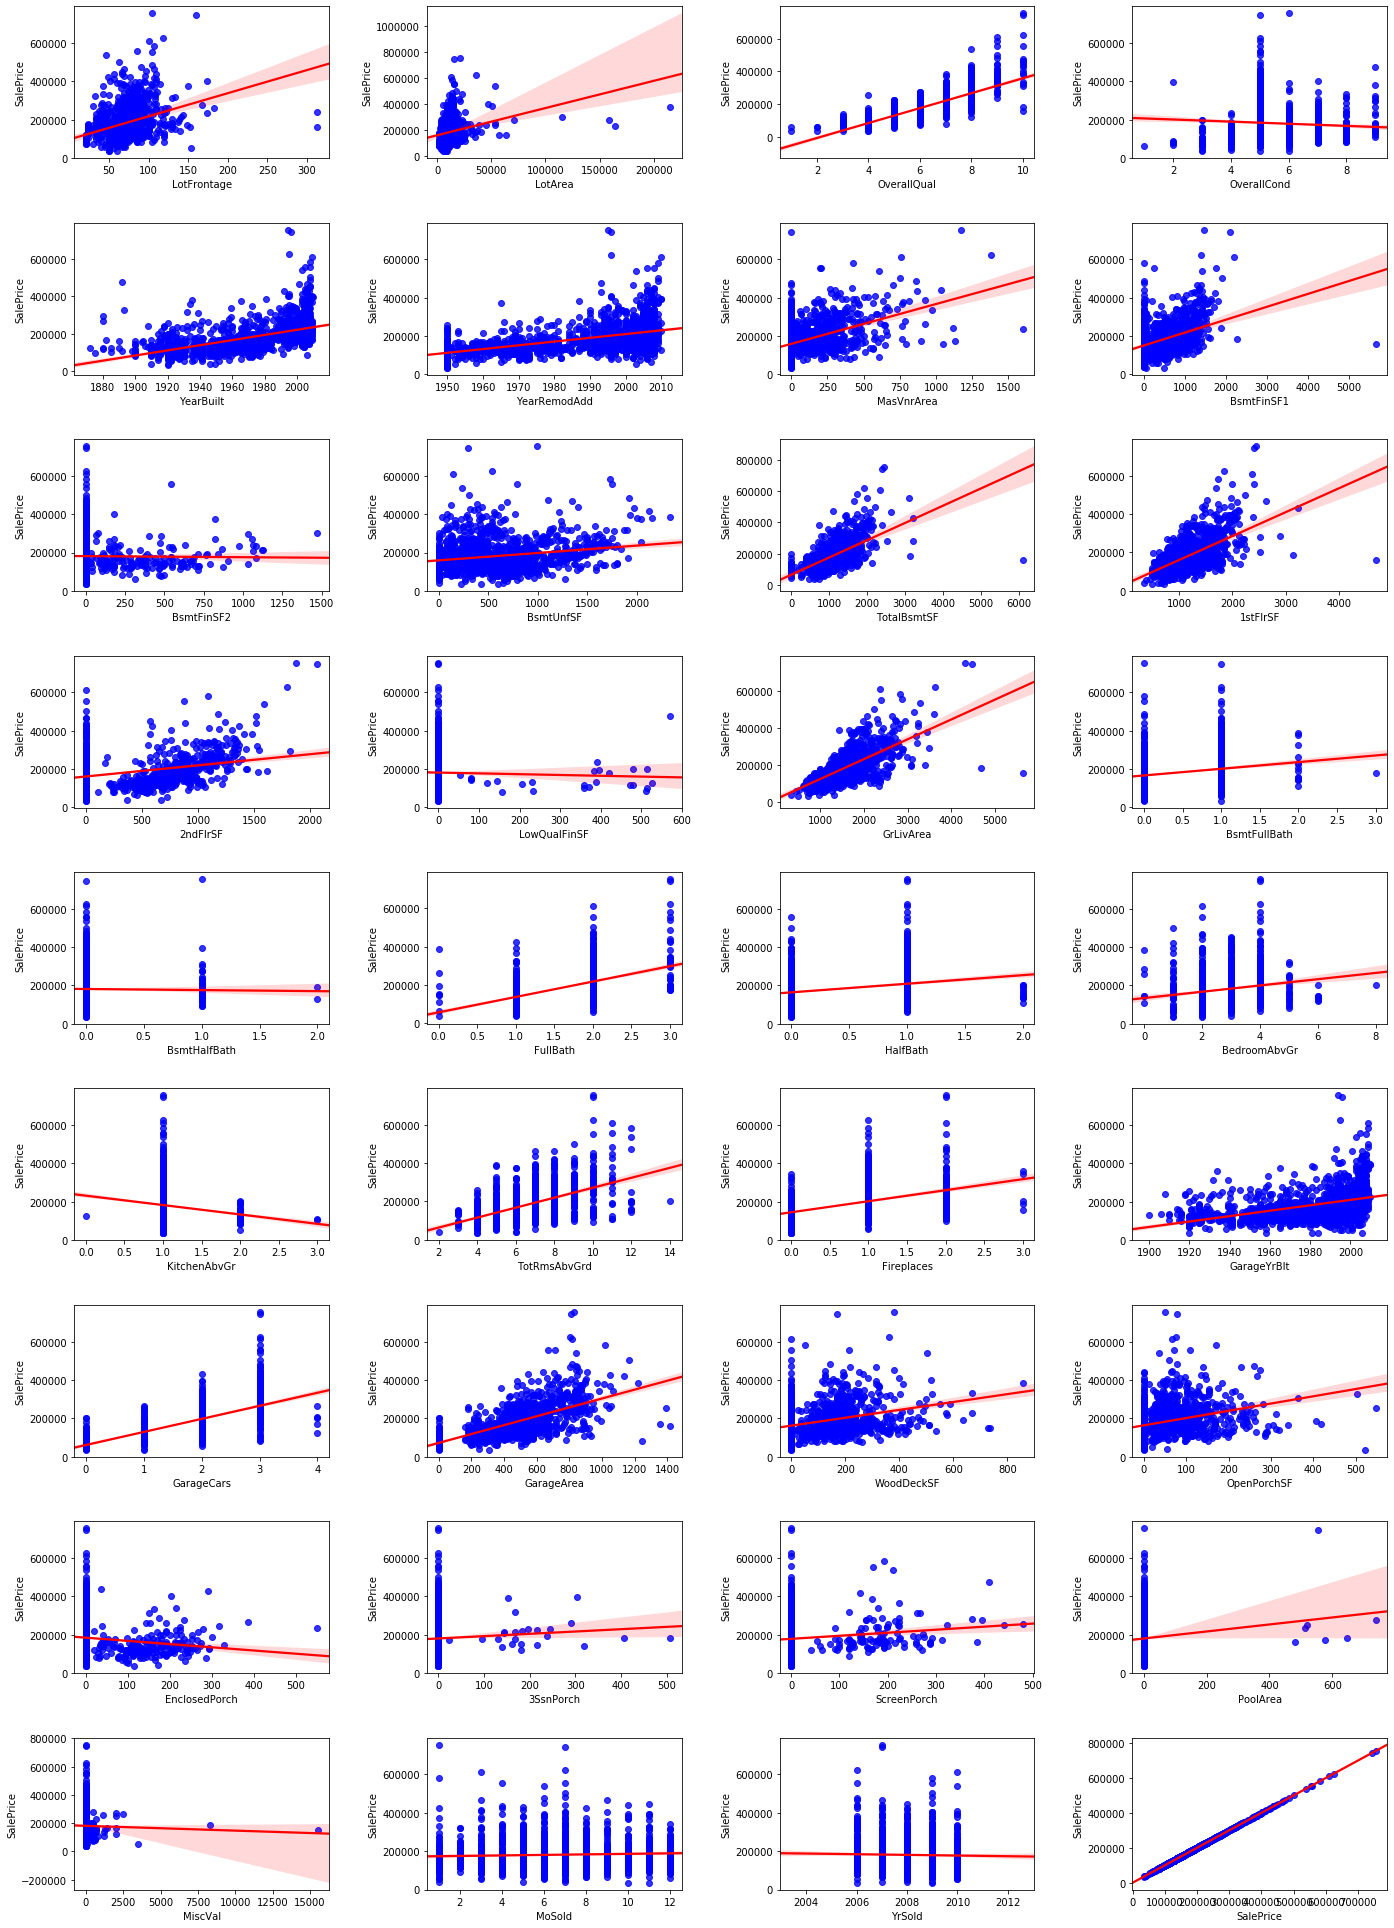

In [26]:
figure = plt.figure(figsize=(20,30))
for i in range(0, len(num_var)):
    plt.subplot(10,4,i+1)
    sns.regplot(house_price.loc[:, num_var[i]], house_price.loc[:, 'SalePrice'], 
                scatter_kws={"color": "blue"}, line_kws={"color": "red"})
    figure.tight_layout(pad = 3.0)

In [27]:
# From above plots note that features such as 'LowQualFinSF', 'ScreenPorch', '3SsnPorch', 
# 'PoolArea' and 'MiscVal' are drastically skewed, and hold zero as their feature value for more
# than ~90% of the entries. We need to remove these, as they are going to be of much significance

house_price = house_price.drop(['LowQualFinSF', 'ScreenPorch', '3SsnPorch', 'PoolArea', 
                                'MiscVal', 'EnclosedPorch'], axis = 1)


### Managing the outliers

Looking at the scatterplot, we can gather idea that there are few outliers present in features. We will plot a BoxPlot to show for the ouliers in `LotFrontage`, `BsmtFinSF1`, `LotArea`, `TotalBsmtSF`, `1stFlrSF`, `GrLivArea`, `WoodDeckSF`, `OpenPorchSF`

In [28]:
# Lets list these in oulier_det_features

outlier_det_features = ['LotFrontage', 'BsmtFinSF1', 'LotArea', 'TotalBsmtSF', '1stFlrSF', 
                        'GrLivArea', 'WoodDeckSF', 'OpenPorchSF']

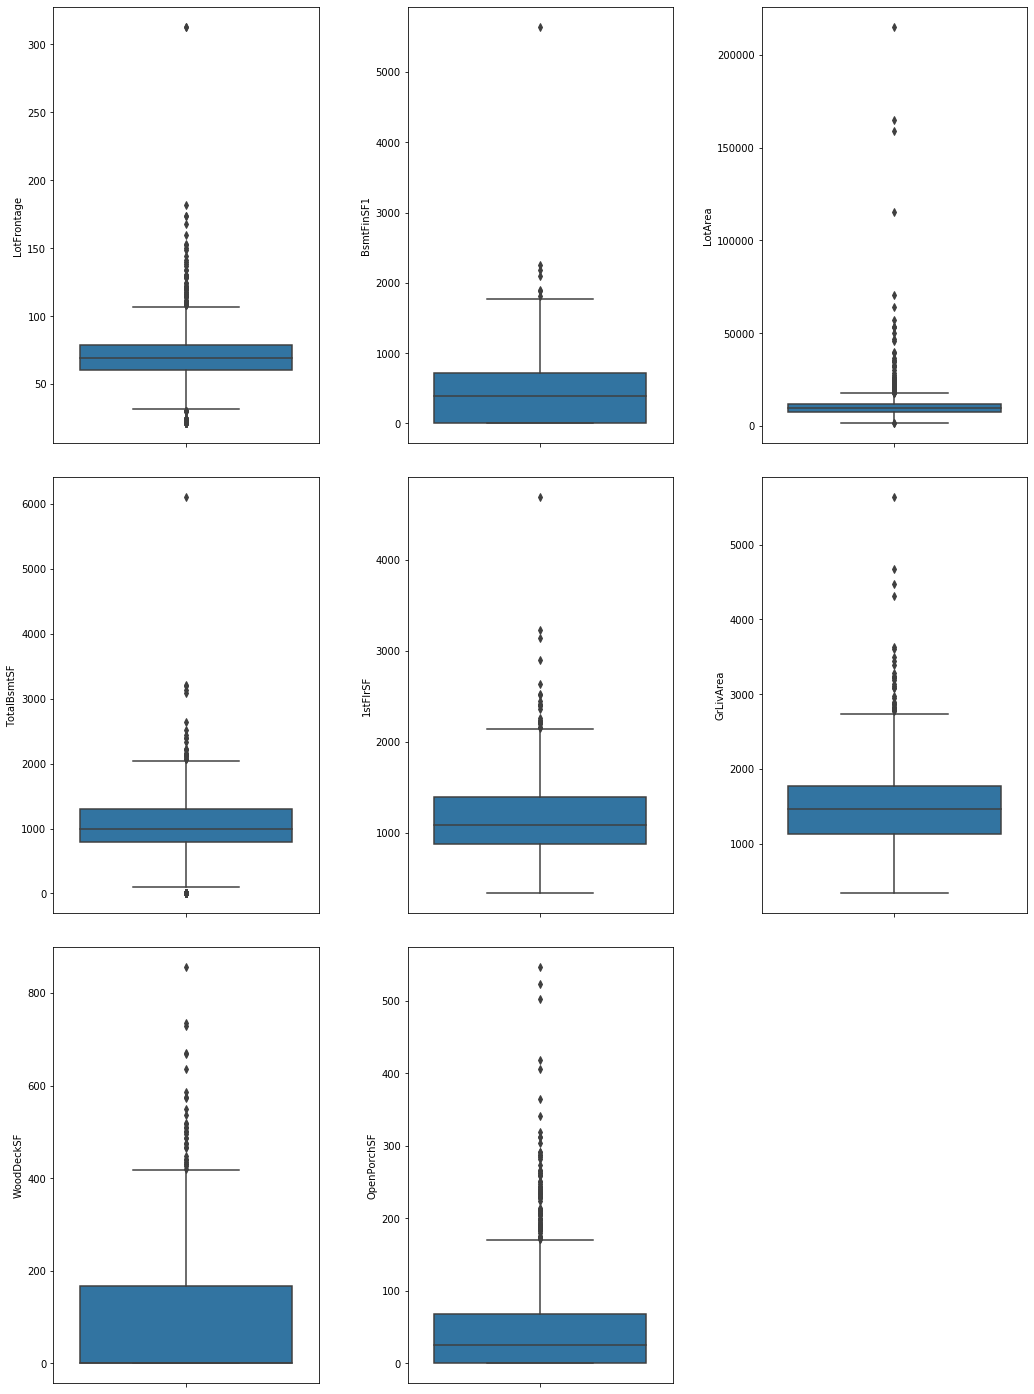

In [29]:
figure = plt.figure(figsize=(15,20))
for i in range(0, len(outlier_det_features)):
    plt.subplot(3,3,i+1)
    sns.boxplot(house_price[outlier_det_features[i]], orient = 'v')
    figure.tight_layout(pad = 3.0)

Lets print the last 30 features of their sorted values for these features, and remove outliers (if exist)

In [30]:
for i in range(0, len(outlier_det_features)):
    print('\n' ,outlier_det_features[i], 
          format(sorted(house_price.LotFrontage.unique())[-30:]))


 LotFrontage [109.0, 110.0, 111.0, 112.0, 114.0, 115.0, 116.0, 118.0, 120.0, 121.0, 122.0, 124.0, 128.0, 129.0, 130.0, 134.0, 137.0, 138.0, 140.0, 141.0, 144.0, 149.0, 150.0, 152.0, 153.0, 160.0, 168.0, 174.0, 182.0, 313.0]

 BsmtFinSF1 [109.0, 110.0, 111.0, 112.0, 114.0, 115.0, 116.0, 118.0, 120.0, 121.0, 122.0, 124.0, 128.0, 129.0, 130.0, 134.0, 137.0, 138.0, 140.0, 141.0, 144.0, 149.0, 150.0, 152.0, 153.0, 160.0, 168.0, 174.0, 182.0, 313.0]

 LotArea [109.0, 110.0, 111.0, 112.0, 114.0, 115.0, 116.0, 118.0, 120.0, 121.0, 122.0, 124.0, 128.0, 129.0, 130.0, 134.0, 137.0, 138.0, 140.0, 141.0, 144.0, 149.0, 150.0, 152.0, 153.0, 160.0, 168.0, 174.0, 182.0, 313.0]

 TotalBsmtSF [109.0, 110.0, 111.0, 112.0, 114.0, 115.0, 116.0, 118.0, 120.0, 121.0, 122.0, 124.0, 128.0, 129.0, 130.0, 134.0, 137.0, 138.0, 140.0, 141.0, 144.0, 149.0, 150.0, 152.0, 153.0, 160.0, 168.0, 174.0, 182.0, 313.0]

 1stFlrSF [109.0, 110.0, 111.0, 112.0, 114.0, 115.0, 116.0, 118.0, 120.0, 121.0, 122.0, 124.0, 128.0, 12

Looking from the sorted list, we can spot which one of these features have outliers

In [31]:
# lets put a threshold value of 200, and get rid of the outliers in `LotFrontage` feature.
print('There are {} values that are outliers in LotFrontage`, we shall get rid of them.' .format(len(house_price[house_price.LotFrontage > 200])))
house_price[house_price.LotFrontage > 200]

There are 2 values that are outliers in LotFrontage`, we shall get rid of them.


LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
934         313.0    27650            7            7       1960          2007   
1298        313.0    63887           10            5       2008          2008   

      MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
934          0.0         425           0        160          585      2069   
1298       796.0        5644           0        466         6110      4692   

      2ndFlrSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
934          0       2069             1             0         2         0   
1298       950       5642             2             0         2         1   

      BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  \
934              4             1             9           1       1960.0   
1298             3             1            12           3       2008.0   

      GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  MoSold  YrSold  \
934            2         505           0            0      11    2008   
1298           2        1418         214          292       1    2008   

      SalePrice  MSSubClass_1-1/2 or 2 or 2-1/2 STORY ALL AGES  \
934      242000                                              0   
1298     160000                                              0   

      MSSubClass_1-STORY 1946 & NEWER ALL STYLES  \
934                                            1   
1298                                           0   

      MSSubClass_11 or 12 STORY 1946 & NEWER  MSSubClass_2-STORY 1946 & NEWER  \
934                                        0                                0   
1298                                       0                                1   

      MSSubClass_DUP/SPLIT  MSZoning_RL  LotShape_Reg  LotConfig_Other  \
934                      0            1             0                0   
1298                     0            1             0                1   

      Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  \
934                      0                    0                     0   
1298                     0                    0                     0   

      Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  \
934                      0                     0                     0   
1298                     0                     0                     0   

      Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  \
934                      0                     0                    0   
1298                     1                     0                    0   

      Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  \
934                      0                     0                   1   
1298                     0                     0                   0   

      Neighborhood_NPkVill  Neighborhood_NWAmes  Neighborhood_NoRidge  \
934                      0                    0                     0   
1298                     0                    0                     0   

      Neighborhood_NridgHt  Neighborhood_OldTown  Neighborhood_SWISU  \
934                      0                     0                   0   
1298                     0                     0                   0   

      Neighborhood_Sawyer  Neighborhood_SawyerW  Neighborhood_Somerst  \
934                     0                     0                     0   
1298                    0                     0                     0   

      Neighborhood_StoneBr  Neighborhood_Timber  Neighborhood_Veenker  \
934                      0                    0                     0   
1298                     0                    0                     0   

      Condition1_Other  BldgType_Other  HouseStyle_2Story  HouseStyle_Other  \
934                  1               0                  0                 0   
1298                 1               0                  1                 0   

      RoofStyle_Other  Exterior

In [32]:
# lets put a threshold value of 71000, and get rid of the outliers in the `LotArea` feature.
print('There are {} values that are outliers in `LotArea`, we shall get rid of them.' .format(len(house_price[house_price.LotArea > 71000])))
house_price[house_price.LotArea > 71000]

There are 4 values that are outliers in `LotArea`, we shall get rid of them.


LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
249         69.0   159000            6            7       1958          2006   
313        150.0   215245            7            5       1965          1965   
335         69.0   164660            5            6       1965          1965   
706         69.0   115149            7            5       1971          2002   

     MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
249       472.0         697           0        747         1444      1444   
313         0.0        1236         820         80         2136      2036   
335         0.0        1249         147        103         1499      1619   
706       351.0        1219           0        424         1643      1824   

     2ndFlrSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
249       700       2144             0             1         2         0   
313         0       2036             2             0         2         0   
335       167       1786             2             0         2         0   
706         0       1824             1             0         2         0   

     BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  \
249             4             1             7           2       1958.0   
313             3             1             8           2       1965.0   
335             3             1             7           2       1965.0   
706             2             1             5           2       1971.0   

     GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  MoSold  YrSold  \
249           2         389           0           98       6    2007   
313           2         513           0            0       6    2009   
335           2         529         670            0       8    2008   
706           2         739         380           48       6    2007   

     SalePrice  MSSubClass_1-1/2 or 2 or 2-1/2 STORY ALL AGES  \
249     277000                                              1   
313     375000                                              0   
335     228950                                              0   
706     302000                                              0   

     MSSubClass_1-STORY 1946 & NEWER ALL STYLES  \
249                                           0   
313                                           1   
335                                           0   
706                                           1   

     MSSubClass_11 or 12 STORY 1946 & NEWER  MSSubClass_2-STORY 1946 & NEWER  \
249                                       0                                0   
313                                       0                                0   
335                                       0                                0   
706                                       0                                0   

     MSSubClass_DUP/SPLIT  MSZoning_RL  LotShape_Reg  LotConfig_Other  \
249                     0            1             0                1   
313                     0            1             0                0   
335                     1            1             0                1   
706                     0            1             0                1   

     Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  \
249                     0                    0                     0   
313                     0                    0                     0   
335                     0                    0                     0   
706                     0                    0                     0   

     Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  \
249                     1                     0                     0   
313                     0                     0                     0   
335                     0                     0                     0   
706                     1                     0                     0   

     Neighborhood_Edwards  Ne

Note both the features with outliers shown above, i.e., `LotFrontage` and `LotArea` are having high corresponding `SalePrice`. If we remove these, it will have an impact on our model performance (<font color='brown'>as our model might not perform well in predicting the <b>expensive houses</b></font>).

> Therefore we would refrain from removing these outliers, and build the model with them.

### Derived Metrics
Let us derive few features out of the given ones, that might help in explaining the SalesPrice relation.

In [33]:
# Lets take reference of current year 2020, and calculate 
# 1. the age of the house
# 2. the age of the house since it was remodelled
# 3. the age of the garage

current_year = 2020

house_age = [(current_year - i) for i in house_price.YearBuilt]
house_age_since_remod = [(current_year - i) for i in house_price.YearRemodAdd]
house_garage_age = [(current_year - i) for i in house_price.GarageYrBlt]

# We'll insert the derived columns before SalePrice for better readability
pos = house_price.columns.get_loc('SalePrice')

house_price.insert(pos, 'house_age', house_age)
house_price.insert((pos+1), 'house_age_since_remod', house_age_since_remod)
house_price.insert((pos+2), 'house_garage_age', house_garage_age)
house_price.head()

LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0         65.0     8450            7            5       2003          2003   
1         80.0     9600            6            8       1976          1976   
2         68.0    11250            7            5       2001          2002   
3         60.0     9550            7            5       1915          1970   
4         84.0    14260            8            5       2000          2000   

   MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
0       196.0         706           0        150          856       856   
1         0.0         978           0        284         1262      1262   
2       162.0         486           0        434          920       920   
3         0.0         216           0        540          756       961   
4       350.0         655           0        490         1145      1145   

   2ndFlrSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0       854       1710             1             0         2         1   
1         0       1262             0             1         2         0   
2       866       1786             1             0         2         1   
3       756       1717             1             0         1         0   
4      1053       2198             1             0         2         1   

   BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  \
0             3             1             8           0       2003.0   
1             3             1             6           1       1976.0   
2             3             1             6           1       2001.0   
3             3             1             7           1       1998.0   
4             4             1             9           1       2000.0   

   GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  MoSold  YrSold  house_age  \
0           2         548           0           61       2    2008         17   
1           2         460         298            0       5    2007         44   
2           2         608           0           42       9    2008         19   
3           3         642           0           35       2    2006        105   
4           3         836         192           84      12    2008         20   

   house_age_since_remod  house_garage_age  SalePrice  \
0                     17              17.0     208500   
1                     44              44.0     181500   
2                     18              19.0     223500   
3                     50              22.0     140000   
4                     20              20.0     250000   

   MSSubClass_1-1/2 or 2 or 2-1/2 STORY ALL AGES  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   MSSubClass_1-STORY 1946 & NEWER ALL STYLES  \
0                                           0   
1                                           1   
2                                           0   
3                                           0   
4                                           0   

   MSSubClass_11 or 12 STORY 1946 & NEWER  MSSubClass_2-STORY 1946 & NEWER  \
0                                       0                                1   
1                                       0                                0   
2                                       0                                1   
3                                       0                                0   
4                                       0                                1   

   MSSubClass_DUP/SPLIT  MSZoning_RL  LotShape_Reg  LotConfig_Other  \
0                     0            1             1                0   
1                     0            1             1                1   
2                     0            1             0                0   
3             

In [34]:
house_price.shape

(1460, 126)

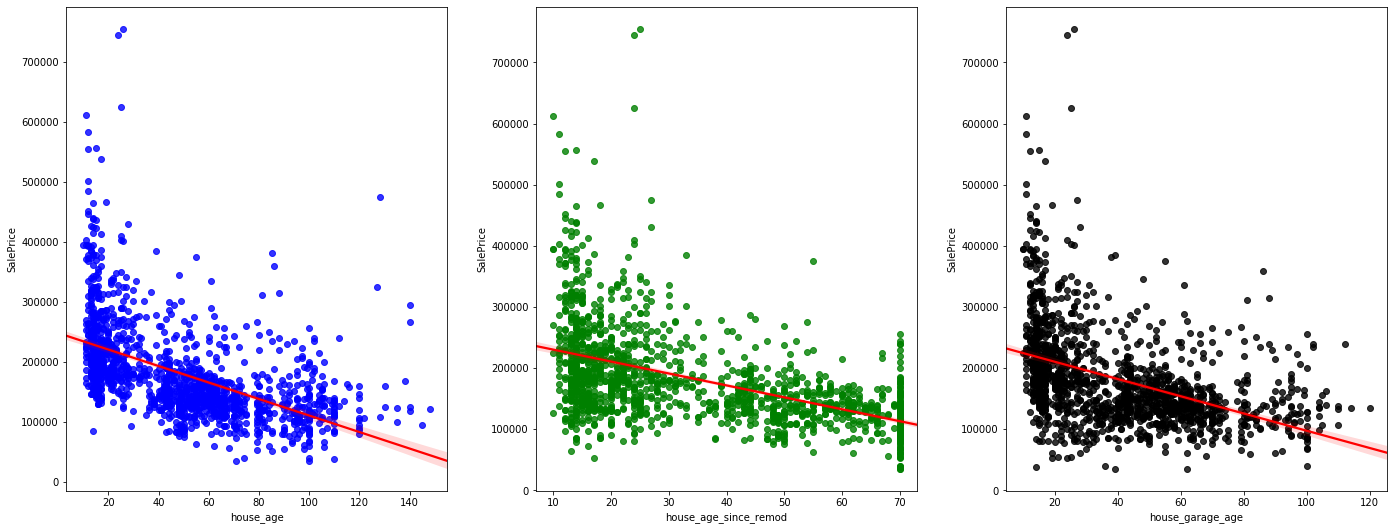

In [35]:
# Lets plot the derived features against SalePrice

figure = plt.figure(figsize=(20,8))
plt.subplot(1,3,1)
sns.regplot(house_price['house_age'], house_price['SalePrice'], scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.subplot(1,3,2)
sns.regplot(house_price['house_age_since_remod'], house_price['SalePrice'], scatter_kws={"color": "green"}, line_kws={"color": "red"})
plt.subplot(1,3,3)
sns.regplot(house_price['house_garage_age'], house_price['SalePrice'], scatter_kws={"color": "black"}, line_kws={"color": "red"})
figure.tight_layout(pad = 3.0)

With the above derived metrics of house/garage age, there can be observed a negative linear relation with the SalePrice.

### Correlation among the features

In [36]:
# let store the index of the 'SalePrice column', we'll use it for correlation matrix
pos_response_var = house_price.columns.get_loc('SalePrice')

In [37]:
# Correlation between the numeric features and the target variable

corr_num_target = pd.DataFrame(house_price[house_price.columns[:pos_response_var+1]].corr()['SalePrice'][:]).sort_values(by='SalePrice', ascending = False)
corr_num_target

SalePrice
SalePrice               1.000000
OverallQual             0.790982
GrLivArea               0.708624
GarageCars              0.640409
GarageArea              0.623431
TotalBsmtSF             0.613581
1stFlrSF                0.605852
FullBath                0.560664
TotRmsAbvGrd            0.533723
YearBuilt               0.522897
YearRemodAdd            0.507101
MasVnrArea              0.472614
Fireplaces              0.466929
GarageYrBlt             0.431729
BsmtFinSF1              0.386420
LotFrontage             0.334771
WoodDeckSF              0.324413
2ndFlrSF                0.319334
OpenPorchSF             0.315856
HalfBath                0.284108
LotArea                 0.263843
BsmtFullBath            0.227122
BsmtUnfSF               0.214479
BedroomAbvGr            0.168213
MoSold                  0.046432
BsmtFinSF2             -0.011378
BsmtHalfBath           -0.016844
YrSold                 -0.028923
OverallCond            -0.077856
KitchenAbvGr           -0.135907
house_garage_age       -0.431729
house_age_since_remod  -0.507101
house_age              -0.522897

##### Observations:

`OverallQual`, `GrAreaLiv`, `GarageCars`, `GarageArea` are highly correlated with the `SalePrice`.

Lets plot these below

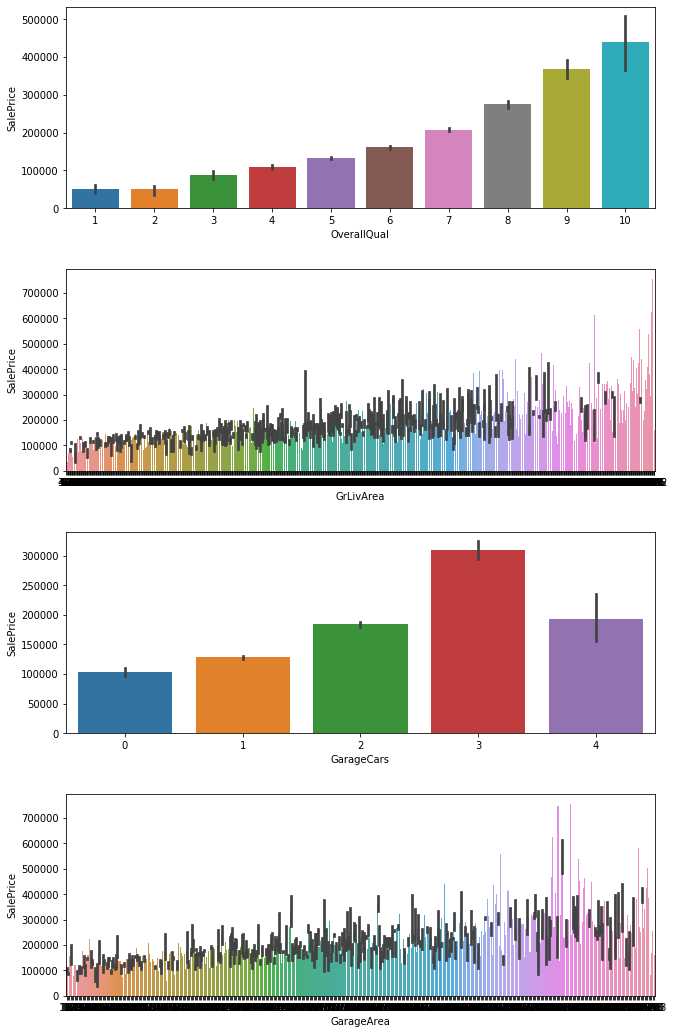

In [40]:
# Plots for highly correlated features with SalePrice
figure =plt.figure(figsize=(10,15))
plt.subplot(4,1,1)
sns.barplot(house_price.OverallQual,house_price.SalePrice)
plt.subplot(4,1,2)
sns.barplot(house_price.GrLivArea,house_price.SalePrice)
plt.subplot(4,1,3)
sns.barplot(house_price.GarageCars,house_price.SalePrice)
plt.subplot(4,1,4)
sns.barplot(house_price.GarageArea,house_price.SalePrice)
figure.tight_layout(pad = 3.0)

In [39]:
# Correlation between the categorical features and the target variable

corr_categ_target = pd.DataFrame(house_price[house_price.columns[pos_response_var:]].corr()['SalePrice'][:]).sort_values(by='SalePrice', ascending = False)
corr_categ_target

SalePrice
SalePrice                                       1.000000
Foundation_PConc                                0.497734
BsmtFinType1_GLQ                                0.434597
Neighborhood_NridgHt                            0.402149
MSSubClass_2-STORY 1946 & NEWER                 0.377197
FireplaceQu_Gd                                  0.339329
Neighborhood_NoRidge                            0.330424
BsmtExposure_Gd                                 0.307298
Exterior2nd_VinylSd                             0.306389
Exterior1st_VinylSd                             0.305009
MSZoning_RL                                     0.245063
HouseStyle_2Story                               0.242880
BsmtQual_Gd                                     0.234822
RoofStyle_Other                                 0.224744
Neighborhood_StoneBr                            0.215363
GarageFinish_RFn                                0.169792
FireplaceQu_TA                                  0.163147
SaleCondition_Other                             0.153990
Neighborhood_Somerst                            0.140058
Exterior1st_CemntBd                             0.133492
Exterior2nd_CmentBd                             0.128183
Neighborhood_Timber                             0.126236
ExterCond_TA                                    0.102719
LotConfig_Other                                 0.080538
Exterior2nd_ImStucc                             0.074401
Neighborhood_CollgCr                            0.072626
Neighborhood_Crawfor                            0.071160
Neighborhood_Veenker                            0.063471
Neighborhood_ClearCr                            0.055718
Exterior2nd_Other                               0.045519
BsmtExposure_Mn                                 0.043493
MSSubClass_1-STORY 1946 & NEWER ALL STYLES      0.041274
Exterior1st_Stone                               0.036181
Neighborhood_Gilbert                            0.035940
Exterior1st_BrkFace                             0.032371
Exterior1st_ImStucc                             0.026729
Exterior2nd_BrkFace                             0.024759
Neighborhood_NWAmes                             0.023483
Neighborhood_SawyerW                            0.014560
Exterior2nd_Stone                              -0.016754
Exterior1st_Plywood                            -0.017719
Neighborhood_Blueste                           -0.020250
Exterior2nd_AsphShn                            -0.024524
Exterior1st_CBlock                             -0.025028
Exterior2nd_CBlock                             -0.025028
FireplaceQu_Fa                                 -0.026086
MSSubClass_11 or 12 STORY 1946 & NEWER         -0.026577
Exterior1st_AsphShn                            -0.026677
Exterior1st_Stucco                             -0.029802
Neighborhood_NPkVill                           -0.037910
Exterior2nd_Wd Shng                            -0.040329
Exterior2nd_Stucco                             -0.042416
Exterior2nd_Brk Cmn                            -0.047377
Exterior1st_BrkComm                            -0.051264
Exterior1st_WdShing                            -0.051317
Exterior2nd_Plywood                            -0.052941
Neighborhood_Mitchel                           -0.057845
Neighborhood_SWISU                             -0.063705
Exterior2nd_HdBoard                            -0.067864
FireplaceQu_Po                                 -0.075916
BsmtFinType1_Unf                               -0.083399
BsmtFinType1_LwQ                               -0.084577
Exterior1st_HdBoard                            -0.095148
Neighborhood_BrDale                            -0.101303
Neighborhood_MeadowV                           -0.112544
Condition1_Other                               -0.112968
Neighborhood_Sawyer                            -0.128394
BsmtQual_Fa                                    -0.128725
BsmtFinType1_BLQ                               -0.132914
BsmtFinType1_Rec                               -0.135667


##### Observations:
Features like `Foundation_PConc`, `BsmtFinType1_GLQ`, `Neighborhood_NridgHt` have high correlation with SalePrice, indicating,

- Foundation Type being Poured Concrete has usually higher price
- Good Living Quarters type BsmtFinType1 have usually higher price
- Northridge Heights neighborhood has usually higher price

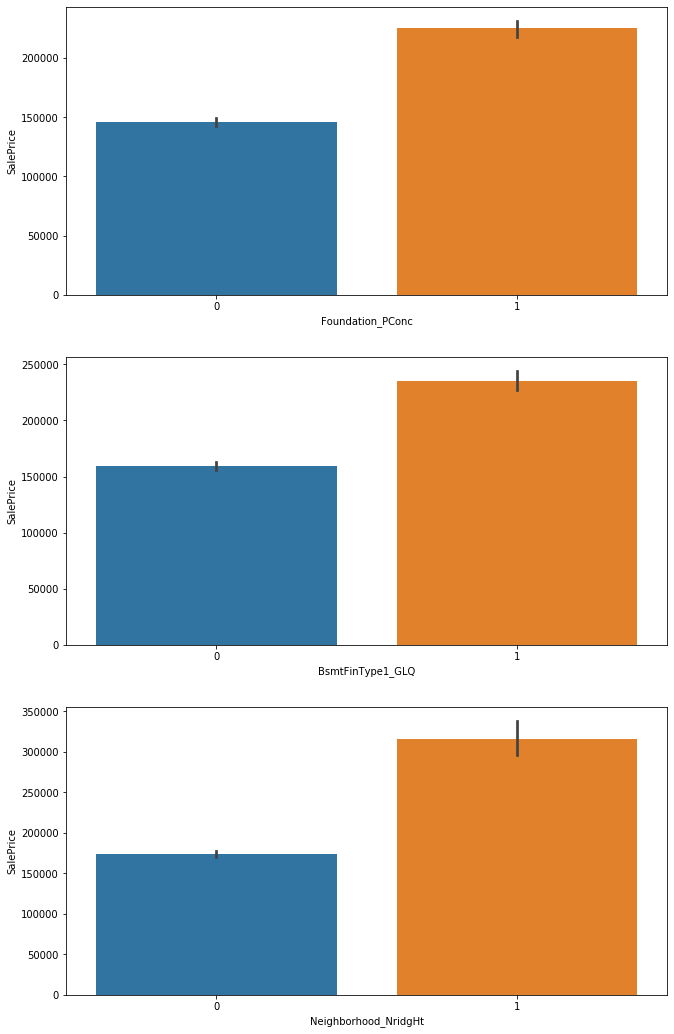

In [41]:
# Plots for highly correlated features with SalePrice
figure =plt.figure(figsize=(10,15))
plt.subplot(3,1,1)
sns.barplot(house_price.Foundation_PConc,house_price.SalePrice)
plt.subplot(3,1,2)
sns.barplot(house_price.BsmtFinType1_GLQ,house_price.SalePrice)
plt.subplot(3,1,3)
sns.barplot(house_price.Neighborhood_NridgHt,house_price.SalePrice)
figure.tight_layout(pad = 3.0)

Lets also have correlation matrix for correaltion among all the features

In [42]:
# Check the correlation between numerical variables if we can identify someting odd
num_var = house_price.columns[:pos_response_var+1]
corr = house_price[num_var].corr()
corr.style.background_gradient(cmap='rainbow')

In [43]:
# Check the correlation between numerical variables if we can identify someting odd
catg_var = house_price.columns[pos_response_var:]
corr = house_price[catg_var].corr()
corr.style.background_gradient(cmap='rainbow')

We find that some of the features show high correlated. Let us look for features having correlation of > abs(0.75)

<b>For numeric variables</b>
1. `GrLivArea` and `TotRmsAbvGr` -> corr = 0.82
Also note that `TotRmsAbvGr` shows high correlation with some other features as well. We will     drop this feature (`TotRmsAbvGr`)
2. `TotalBsmtSF` and `1stFlrSF` -> corr = 0.81
Both of them explain the target variable similarly. So we'll remove one of them (`TotalBsmtSF`)
3. There are also features like `YearBuilt`, `YearRemodAdd`, `GarageYrBlt` and `YrSold`(doesn't have significance) showing high collinearity. We'll remove them, since we already have derived the age features from them


<b>For categorical variables</b>

On fight sight, there are not very highly correlated features. All are within 0.7

In [44]:
house_price = house_price.drop(['GrLivArea', 'TotalBsmtSF', 'YearBuilt', 'YearRemodAdd', 
                                'GarageYrBlt', 'YrSold'], axis=1)

# updating num_var based on 'SalePrice' index (as we know that all the numeric features are 
# before the tarher variable in the table).
# We wont include target variable in this list now.
pos_response_var = house_price.columns.get_loc('SalePrice')
num_var = house_price.columns[:pos_response_var]   

Recall the SalesPrice distribution that we had plotted. The distribution was somewhat right skewed. It could be due to presence of outliers in the data. We can try performing log transformation of the SalePrice and plot the distribution again. Expectation is that we would obtain a Normal Distribution post transformation

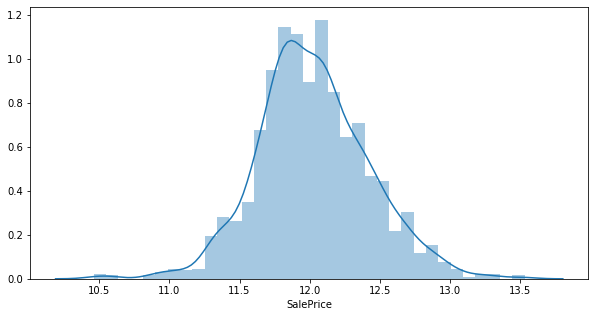

In [45]:
house_price.SalePrice = [np.log(i) for i in house_price.SalePrice]
figure = plt.figure(figsize = (10,5))
sns.distplot(house_price.SalePrice)

The target variable follows a normal like distribution, the skewness we observed earlier is not there anymore

## Train and Test Data Split

In [46]:
# Train Test Data Split

y = house_price.loc[:, 'SalePrice']
X = house_price.loc[:, house_price.columns != 'SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    random_state = 1)

In [47]:
# Rescaling - lets perform scaling on the numeric features

scaler = StandardScaler()

X_train[num_var] = scaler.fit_transform(X_train[num_var])
X_test[num_var] = scaler.transform(X_test[num_var])

C:\Users\akhilshu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\akhilshu\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\akhilshu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

## Model Building without Regularization (Linear Regression)

In [48]:
# linear regression
lm = LinearRegression()
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print('Train data R2 score: ',r2_score(y_true=y_train, y_pred=y_train_pred))

y_test_pred = lm.predict(X_test)
print('Test data R2 score: ',r2_score(y_true=y_test, y_pred=y_test_pred))

Train data R2 score:  0.9097036812833565
Test data R2 score:  0.8653854525495874


We are obtaining a good performance with this Linear model itself

Text(0, 0.5, 'y_train_pred')

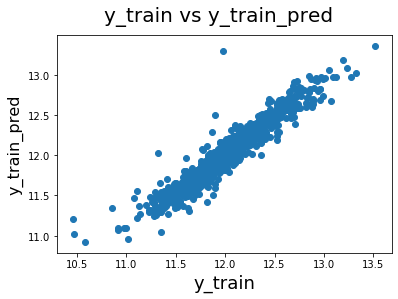

In [49]:
#Plotting y_train and y_train_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_train,y_train_pred)
fig.suptitle('y_train vs y_train_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_train', fontsize=18)                          # X-label
plt.ylabel('y_train_pred', fontsize=16)

Text(0, 0.5, 'y_pred')

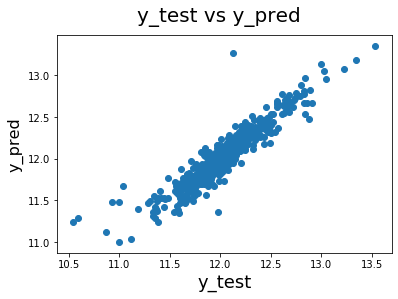

In [50]:
#Plotting y_test and y_test_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label


plt.ylabel('y_pred', fontsize=16)

    Now we will build our model by introducing Regularization term. For this we shall use L1 (Lasso) as well as L2 (Ridge) regularization both, and see how the model perform with respective regularizations.

## Linear model Building with Regularization

### Ridge Regression

In [51]:
# defining a function `Ridge_reg` for performing the Ridge model building

def Ridge_reg(params, X_train_r, y_train_r):
    ridge = Ridge()
    # cross validation
    folds = KFold(n_splits = 5, shuffle = True, random_state = 4)
    model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)

    model_cv.fit(X_train_r, y_train_r)
    
    cv_results = pd.DataFrame(model_cv.cv_results_)
    
    return model_cv, cv_results

In [52]:
# this is the plotting function for both Ridge and Lasso regression

def Plot_CV_result(cv_results):

    # plotting mean test and train scoes with alpha 
    cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
    
   # plotting
    plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
    plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
    plt.xlabel('alpha')
    plt.ylabel('Negative Mean Absolute Error')
    plt.title("Negative Mean Absolute Error and alpha")
    plt.legend(['train score', 'test score'], loc='upper left')
    plt.show()

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.2s finished


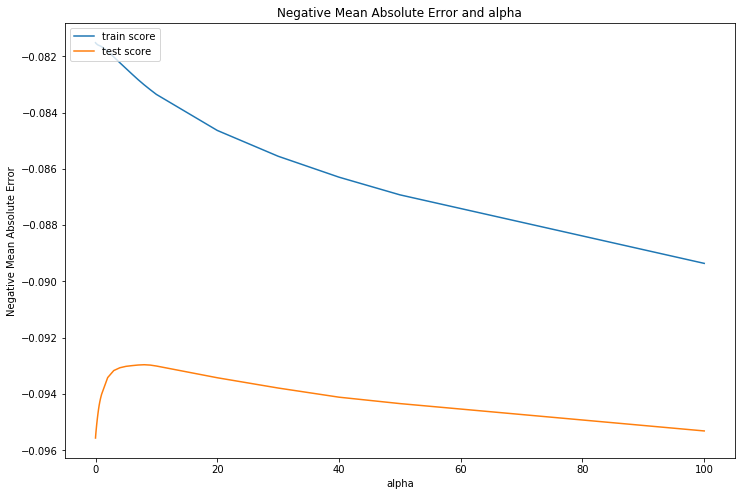

In [53]:
# list of alphas to tune
params_ridge = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 30, 40, 50, 100]}

model_cv_ridge, cv_result_ridge = Ridge_reg(params_ridge, X_train, y_train)
plt.figure(figsize = (12,8))
Plot_CV_result(cv_result_ridge)

We can observe that the test score starts with a lower neg abs. mean error value, and begins to increase with increase in alpha value, upto a certain value, after which it starts declining in value. Lets make use of the `best_params` to find out the best value of `alpha`

In [54]:
# From above plot the optimum value of alpha seems to be around 10.
# Lets make use of `best_params` and `best_score` to find out the optimal alpha and the score
# associated with it.

print('The best alpha value is: ', model_cv_ridge.best_params_)
print('The best score is: ', model_cv_ridge.best_score_)

The best alpha value is:  {'alpha': 8.0}
The best score is:  -0.09295945847026055


In [55]:
# Lets rebuild the model with the optimum alpha value of 8

params_ridge = {'alpha': [8]}
model_cv_final_ridge, cv_results_final_ridge = Ridge_reg(params_ridge, X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [56]:
print('The ' + str(model_cv_final_ridge.scoring) + ' for Train data: ', 
      cv_results_final_ridge['mean_train_score'][0])

print('The ' + str(model_cv_final_ridge.scoring) + ' for Test data: ', 
      cv_results_final_ridge['mean_test_score'][0])

The neg_mean_absolute_error for Train data:  -0.08301282847181243
The neg_mean_absolute_error for Test data:  -0.09295945847026055


In [57]:
# Lets have the coefficients for the ridge model we just built
coef_ridge = model_cv_final_ridge.best_estimator_.coef_
coef_ridge

array([-0.01197868,  0.00680609,  0.09510218,  0.0484351 , -0.00140788,
        0.01763093,  0.00739271,  0.02254576,  0.06403253,  0.08238685,
        0.0279464 ,  0.00554802,  0.02704264,  0.02168916,  0.00318702,
       -0.01381779,  0.02849974,  0.01950947,  0.05121344,  0.01183737,
        0.01107932,  0.00307164,  0.00275026, -0.05757195, -0.01695265,
        0.00927344,  0.03541177,  0.03457286, -0.04503218, -0.01041341,
        0.02092897,  0.05526261, -0.01418209,  0.02166838, -0.01217196,
       -0.03723872,  0.01781806,  0.04094701, -0.00228758,  0.09848898,
       -0.06427292, -0.02852774, -0.05094832, -0.089525  , -0.03203338,
       -0.01829945, -0.00415343, -0.02620477,  0.02469938,  0.09218524,
       -0.01973211, -0.0416625 , -0.01190914, -0.01043926,  0.07954602,
        0.11723619, -0.01715871,  0.01455145, -0.04727232, -0.02104952,
       -0.0383326 , -0.00732445,  0.01405247, -0.00613639,  0.00180747,
        0.07471801, -0.00171935,  0.00622658, -0.0117283 ,  0.00

In [58]:
# Lets make the coef_ridge into a series with Index as the feature name for better readability.
coef_ridge = pd.Series(coef_ridge, index = X_train.columns)

# Lets find out how many coeffcients were picked up and dropped by the Ridge model.
print('The Ridge model with ' + 
      str(model_cv_final_ridge.best_params_).replace("{","").replace("}", "") + 
      ', has picked up ' + str(sum(coef_ridge != 0)) + ' variables and dropped ' + 
      str(sum(coef_ridge == 0)) + '.')

The Ridge model with 'alpha': 8, has picked up 119 variables and dropped 0.


Note in model built using ridge regularization picks up all the available 119 features, dropping none.

In [59]:
# Lets sort the coeff
coef_ridge = coef_ridge.sort_values(ascending = False)
coef_ridge

Neighborhood_StoneBr                             0.117236
Neighborhood_Crawfor                             0.098489
OverallQual                                      0.095102
Neighborhood_NridgHt                             0.092185
2ndFlrSF                                         0.082387
Neighborhood_Somerst                             0.079546
Exterior1st_BrkFace                              0.074718
1stFlrSF                                         0.064033
BsmtExposure_Gd                                  0.056886
MSZoning_RL                                      0.055263
Foundation_PConc                                 0.055009
GarageCars                                       0.051213
OverallCond                                      0.048435
Neighborhood_ClearCr                             0.040947
Exterior2nd_VinylSd                              0.039378
MSSubClass_1-1/2 or 2 or 2-1/2 STORY ALL AGES    0.035412
MSSubClass_1-STORY 1946 & NEWER ALL STYLES       0.034573
BsmtFinType1_G

Text(0.5, 1.0, 'Coefficients in the Ridge Model')

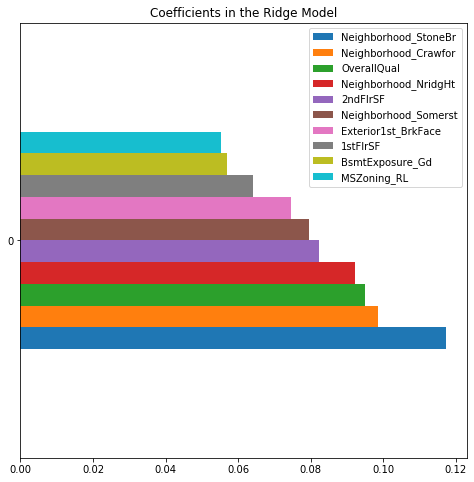

In [60]:
# Lets plot 10 most powerful predictor features
pow_feat_coef_ridge = pd.DataFrame([coef_ridge.head(10)])

pow_feat_coef_ridge.plot(figsize=(8,8), kind = "barh")
plt.title("Coefficients in the Ridge Model")

    From above plot, we can say that, 
        Neighborhood: Stone Brook, 
        Neighborhood: Crawford and 
        OverallQuality 
    are some of the strongest driving factors towards the house Sale price.

In [61]:
# predict
y_train_pred = model_cv_final_ridge.predict(X_train)
print('R2_score for Ridge Train data :', r2_score(y_true=y_train, y_pred=y_train_pred))

y_test_pred = model_cv_final_ridge.predict(X_test)
print('R2_score for Ridge Test data :', r2_score(y_true=y_test, y_pred=y_test_pred))

R2_score for Ridge Train data : 0.9064609187747461
R2_score for Ridge Test data : 0.8704111822545475


Note there is a slight improvement in R2 score (compared to Linear Regression without Regularization). This indicates to us that the ridge regularization term introduced has helped in resolving high variance

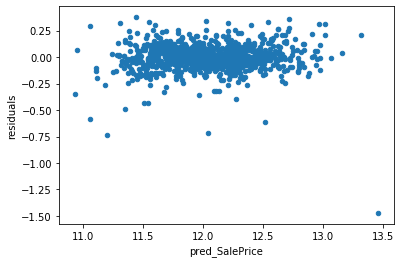

In [62]:
#lets plot the residuals vs predicted SalePrice

predict_df = pd.DataFrame({"pred_SalePrice":y_train_pred, "true_SalePrice":y_train})
predict_df["residuals"] = predict_df["true_SalePrice"] - predict_df["pred_SalePrice"]
predict_df.plot(x = "pred_SalePrice", y = "residuals", kind = "scatter")

Above plot indicates that for every predicted value, the residuals are distributed around zero, which further indicates the good performance of the built model.

### Lasso Regression

In [63]:
# Lets define a function `Lasso_reg` for performing the model building operation for Lasso

def Lasso_reg(params, X_train_r, y_train_r):
    lasso = Lasso()

    # cross validation
    folds = KFold(n_splits = 5, shuffle = True, random_state = 4)
    model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

    model_cv.fit(X_train_r, y_train_r) 
    
    cv_results = pd.DataFrame(model_cv.cv_results_)

    return (model_cv, cv_results)

In [64]:
params_lasso = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20]}

model_cv_lasso, cv_results_lasso = Lasso_reg(params_lasso, X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.9s finished


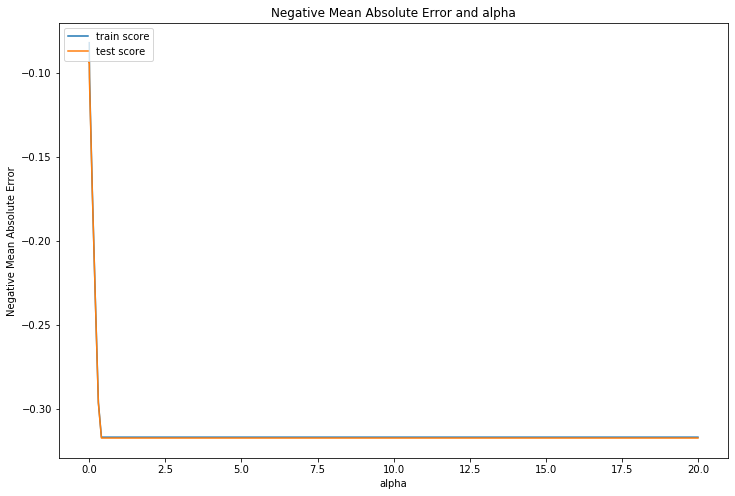

In [65]:
plt.figure(figsize = (12,8))
Plot_CV_result(cv_results_lasso)

In [66]:
# Lets shorten the range of alpha for better visual regarding its optimal value

params_lasso = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1]}

model_cv_lasso, cv_results_lasso = Lasso_reg(params_lasso, X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.2s finished


In [67]:
print('The best alpha value is: ', model_cv_lasso.best_params_)
print('The best score is: ', model_cv_lasso.best_score_)

The best alpha value is:  {'alpha': 0.001}
The best score is:  -0.09313422176708566


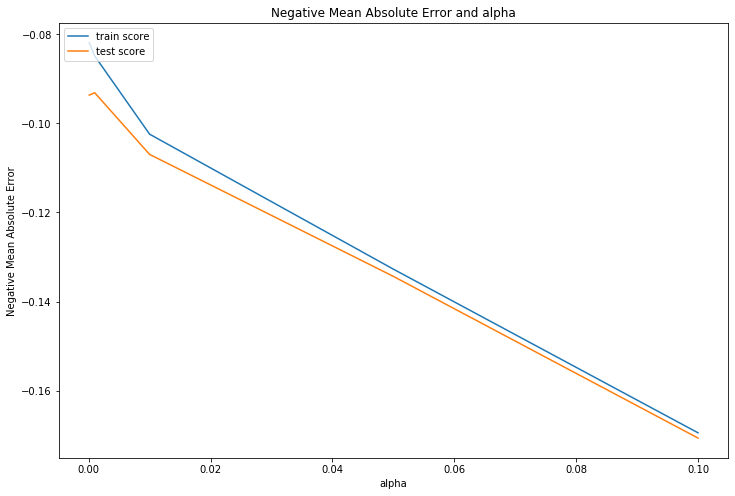

In [68]:
plt.figure(figsize = (12,8))
Plot_CV_result(cv_results_lasso)

We can observe that the test score starts with a lower neg abs. mean error value, and with a slight increase in Alpha, rises a little, after which there is continuous decline in its value. As we have found out that this `alpha value` corresponds to `0.001`, lets model for this value of alpha.

In [69]:
# As the best alpha value suggested is 0.001

params_lasso = {'alpha': [0.001]}
model_cv_final_lasso, cv_results_final_lasso = Lasso_reg(params_lasso, X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [70]:
print('The ' + str(model_cv_final_lasso.scoring) + ' for Train data: ', 
      cv_results_final_lasso['mean_train_score'][0])

print('The ' + str(model_cv_final_lasso.scoring) + ' for Test data: ', 
      cv_results_final_lasso['mean_test_score'][0])

The neg_mean_absolute_error for Train data:  -0.08489136571834906
The neg_mean_absolute_error for Test data:  -0.09313422176708566


In [71]:
# Lets have the coefficients for the lasso model we just built
coef_lasso = model_cv_final_lasso.best_estimator_.coef_
coef_lasso

array([-0.00710783,  0.00850233,  0.10180921,  0.05017227, -0.        ,
        0.01544936,  0.00563903,  0.01897945,  0.07359511,  0.08356562,
        0.02914526,  0.00476418,  0.02147319,  0.01778802,  0.00345179,
       -0.0106191 ,  0.02446403,  0.02281669,  0.05456259,  0.00714084,
        0.01040895,  0.00307925,  0.00194433, -0.06101241, -0.01495903,
        0.00402723,  0.01707725,  0.029169  , -0.02838494, -0.        ,
        0.        ,  0.06330488, -0.01162423,  0.01581778, -0.        ,
       -0.        ,  0.01076157,  0.02941001,  0.        ,  0.10587751,
       -0.04105869, -0.00144709, -0.        , -0.01394886, -0.        ,
        0.        , -0.        , -0.00037907,  0.        ,  0.08591669,
       -0.        , -0.        ,  0.        , -0.        ,  0.08589218,
        0.11104477, -0.        ,  0.        , -0.0415555 , -0.02679295,
       -0.03766282,  0.        ,  0.0069718 , -0.        , -0.        ,
        0.06170987, -0.        ,  0.        , -0.00758952,  0.  

In [72]:
# Lets make the coef_lasso into a series with Index as the feature name for better readability.
coef_lasso = pd.Series(coef_lasso, index = X_train.columns)

# Lets find out how many coeffcients were picked up and dropped by the Ridge model.
print('The Lasso model with ' + 
      str(model_cv_final_lasso.best_params_).replace("{","").replace("}", "") + 
      ' has picked up ' + str(sum(coef_lasso != 0)) + ' variables and dropped ' + 
      str(sum(coef_lasso == 0)) + '.')

The Lasso model with 'alpha': 0.001 has picked up 67 variables and dropped 52.


Note above, the model built using lasso regularization picks up 67 features, dropping 52. Lasso helped us here in feature reduction.

In [73]:
# Lets sort the coeff
coef_lasso = coef_lasso.sort_values(ascending = False)
coef_lasso

Neighborhood_StoneBr                             0.111045
Neighborhood_Crawfor                             0.105878
OverallQual                                      0.101809
Neighborhood_NridgHt                             0.085917
Neighborhood_Somerst                             0.085892
2ndFlrSF                                         0.083566
1stFlrSF                                         0.073595
MSZoning_RL                                      0.063305
Exterior1st_BrkFace                              0.061710
GarageCars                                       0.054563
BsmtExposure_Gd                                  0.050267
OverallCond                                      0.050172
Foundation_PConc                                 0.035722
Neighborhood_ClearCr                             0.029410
MSSubClass_1-STORY 1946 & NEWER ALL STYLES       0.029169
BsmtFullBath                                     0.029145
BsmtFinType1_GLQ                                 0.028622
TotRmsAbvGrd  

Text(0.5, 1.0, 'Coefficients in the Lasso Model')

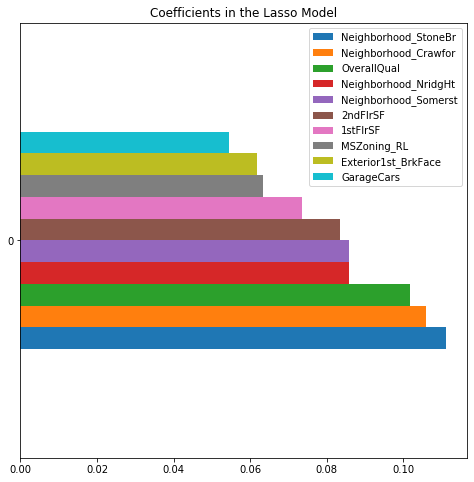

In [74]:
# Lets plot 10 most powerful predictor features
pow_feat_coef_lasso = pd.DataFrame([coef_lasso.head(10)])

pow_feat_coef_lasso.plot(figsize=(8,8), kind = "barh")
plt.title("Coefficients in the Lasso Model")

    From above plot, we can say that, 
        Neighborhood: Stone Brook, 
        Neighborhood: Crawford and 
        OverallQuality 
    are some of the strong driving factors towards the house Sale price.

In [75]:
# predict
y_train_pred = model_cv_final_lasso.predict(X_train)
print('R2_score for Lasso Train data :', r2_score(y_true=y_train, y_pred=y_train_pred))

y_test_pred = model_cv_final_lasso.predict(X_test)
print('R2_score for Lasso Test data :', r2_score(y_true=y_test, y_pred=y_test_pred))

R2_score for Lasso Train data : 0.9010370920128921
R2_score for Lasso Test data : 0.8673839027569117


Note there is a very slight improvement in R2 score (compared to Linear Regression without Regularization). But this improvement has come together with reduction in features, which has made the model much more light.

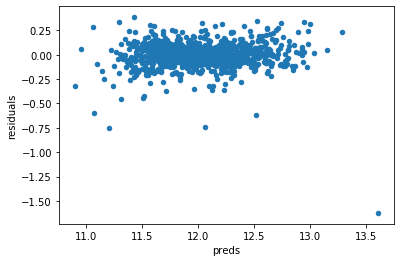

In [76]:
#let's look at the residuals as well:
predicted_lasso = pd.DataFrame({"preds":y_train_pred, "true":y_train})
predicted_lasso["residuals"] = predicted_lasso["true"] - predicted_lasso["preds"]
predicted_lasso.plot(x = "preds", y = "residuals",kind = "scatter")

Above plot indicates that for every predicted value, the residuals are distributed around zero, which further indicates the good performance of the built model.

---------------------------------------------------------------------------------------------------

We have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, we need to decide which one should we choose as our final model.

The optimal value of alpha we found out for the Ridge and Lasso regularization are 8 and 0.001
respectively.

Lasso (L1) and Ridge (L2) are form of regularized linear regressions. Both the regularizations work in different ways, in the sense that while Ridge focuses on regularizing by reducing the coefficient values of the feature variables (but doesn’t zero out the parameter coef.), while Lasso focuses on regularizing by shrinking some of the feature coefficients to zero (the coefficient of features that are redundant would be made zero), thereby helping in reduction of number of feature, and providing a sparse feature solution.

In the models that we have built for both Lasso and Ridge, we can see similar performance on Negative Mean Absolute Error, similar R2 score on test data. Both Lasso and Ridge have many similar powerful predictor variables too.

The difference (which is an important one) lies in the fact that Lasso picked up just 58 features
and dropped the rest 61 features (whereas Ridge picked up all 119 features). Due to reduction in
the number of features, Lasso makes the model much light and less complex, and easier to
explain.


>Since Lasso provides similar performance compared to Ridge, but with significantly less number of
features (than Ridge), Lasso is the model that I would choose as my final model.

--------------------------------------------------------------------------------------------------